In [1]:
# Import necessary libraries for the project

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import pdb # debugging library

!pip install folium
import folium

#Display all rows and columns of the dataframe

#pd.pandas.set_option('display.max_rows', None)
#pd.pandas.set_option('display.max_columns', None)

# Data Exploration

In [2]:
listings = pd.read_csv('boston_listings.csv')
print("This dataset has {} rows and {} columns".format(listings.shape[0],listings.shape[1]),end="\n")

This dataset has 3585 rows and 95 columns


In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


### Map of Boston

In [4]:
lat = listings['latitude'].mean()
long = listings['longitude'].mean()

# Creating a dataframe with zipcode and price columns
zipcode_df = listings.loc[:,['zipcode','price']]

zipcode_df['price'] = zipcode_df['price'].str.replace('$','')
zipcode_df['price'] = zipcode_df['price'].str.replace(',','')

# Converting price to a float
zipcode_df['price'] = zipcode_df['price'].astype(float)

zipcode_df = zipcode_df.dropna()

In [5]:
# Analyzing the zipcode values to determine if modifications needed
pd.pandas.set_option('display.max_rows', None)
zipcode_df['zipcode'].unique()

array(['02131', '02130', '02119', '02120', '02115', '02215', '02116',
       '02111', '02109', '02113', '02110', '02114', '02108', '02121',
       '02118', '02125', '02124', '02210', '02218', '02142', '02128',
       '02129', '02145', '02126', '02108 02111', '02472', '02122',
       '02446', '02135', '02134', '02445', '02132', '02467', '02136',
       '02186', '02169', '02127', '02134-1704', '02163', '02138', '02139',
       '02141', '02143'], dtype=object)

In [6]:
zipcode_df['zipcode'] = zipcode_df['zipcode'].str.replace('02134-1704','02134')
zipcode_df['zipcode'] = zipcode_df['zipcode'].str.replace('02108 02111','02108')

In [7]:
map = folium.Map(location=[lat,long],default_zoom_start=15)

folium.Choropleth(geo_data='/Users/Brandon/Desktop/Udacity/ZIP_Codes.geojson',
              data = zipcode_df, 
              columns = ['zipcode','price'],
              key_on = 'feature.properties.ZIP5',
              fill_color='YlOrRd',
              fill_opacity=0.7,
              line_opacity=0.2,
              legend_name='Listing Price',
              highlight = True
              ).add_to(map)

map

### Data Type Analysis - Categorical Columns

In [9]:
obj_cols = listings.select_dtypes(include='object')

print("This dataset has {} rows and {} columns".format(obj_cols.shape[0],obj_cols.shape[1]),end="\n")

obj_cols.head()

This dataset has 3585 rows and 62 columns


,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/12147973,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...",...,$0.00,2 weeks ago,2016-09-06,NaN,NaN,f,f,moderate,f,f
1,https://www.airbnb.com/rooms/3075044,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,...,$0.00,a week ago,2016-09-06,2014-06-01,2016-08-13,f,t,moderate,f,f
2,https://www.airbnb.com/rooms/6976,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...",...,$20.00,5 days ago,2016-09-06,2009-07-19,2016-08-05,f,f,moderate,t,f
3,https://www.airbnb.com/rooms/1436513,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,There are buses that stop right in front of th...,...,$25.00,a week ago,2016-09-06,2016-08-28,2016-08-28,f,f,moderate,f,f
4,https://www.airbnb.com/rooms/7651065,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,From Logan Airport and South Station you have...,...,$0.00,2 weeks ago,2016-09-06,2015-08-18,2016-09-01,f,f,flexible,f,f


### Some data types are incorrectly labeled and need to be converted to numerical and date type columns

### Numerical Columns:

##### Percentages 

1. host_response_rate
2. host_acceptance_rate

##### Currency 

3. price (currency)
4. weekly_price
5. monthly_price
6. security_deposit
7. cleaning_fee
8. extra_people

### Date Columns:

1. last_scraped
2. host_since
3. calendar_last_scraped
4. first_review
5. last_review

In [10]:
percent_cols = ['host_response_rate','host_acceptance_rate']
currency_cols = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']
date_cols = ['last_scraped','host_since','calendar_last_scraped','first_review','last_review']


# Converting currency strings to numerical values
for feature in currency_cols:
    
    listings[feature] = listings[feature].str.replace('$','')
    listings[feature] = listings[feature].str.replace(',','')
    
    # Converting from an object datatype to a float
    listings[feature] = listings[feature].astype(float)
    
     
# Converting percentage strings to numerical values
for feature in percent_cols:
    
    listings[feature] = listings[feature].str.replace('%','')
    
    # Converting from an object datatype to a float
    listings[feature] = listings[feature].astype(float)
    
    # Converting to decimal form
    listings[feature] = listings[feature].map(lambda x: x/100)


# Converting to date type
from datetime import datetime

for date in date_cols:
    listings[date] = pd.to_datetime(listings[date], format='%Y-%m-%d')

In [11]:
# Renaming columns to show the values are in dollar amounts

for label in currency_cols:
    listings.rename({label:label+"($)"},axis=1, inplace=True)
    
#Renaming columns to show the values are percentages

for label in percent_cols:
    listings.rename({label:label+"(%)"}, axis=1, inplace=True)

In [12]:
obj_cols2 = listings.select_dtypes(include='object')

# Checking the new object type column count

print("This dataset has {} rows and {} columns".format(obj_cols2.shape[0],obj_cols2.shape[1]),end="\n")

obj_cols2.head(1)

This dataset has 3585 rows and 49 columns


,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,property_type,room_type,bed_type,amenities,calendar_updated,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",...,House,Entire home/apt,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",2 weeks ago,f,f,moderate,f,f


### Dropping categorical columns

### Below are categorical columns with NO variation. These can be safely deleted because they have no predictive power.

1. experiences_offered
2. state
3. country_code
4. country
5. requires_license

In [13]:
cols_no_variation = []

# create a list of columns with object datatype

obj_cols_list = list(listings.select_dtypes(include='object').columns) 

for feature in obj_cols_list:
    
    # if column has 0 variation in its values, we append to cols_no_variation
    
    if listings[feature].value_counts()[0] == listings.shape[0]:
        cols_no_variation.append(feature)

# Dropping columns with no variation

listings.drop(cols_no_variation,axis=1,inplace=True)

print ("5 columns were deleted so we now have {} columns remaining".format(listings.shape[1]))

5 columns were deleted and so we now have 90 columns remaining


Other columns can be dropped, such as 'listing_url' because they serve no purpose in the price prediction. 

In [14]:
cols_high_var = []

for feature in list(listings.select_dtypes(include='object').columns):
    
    # We will drop categorical columns with 50 or more distinct values
    
    if len(listings[feature].unique()) >= 50:
        cols_high_var.append(feature)

In [15]:
cols_high_var

['listing_url',
 'name',
 'summary',
 'space',
 'description',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_verifications',
 'street',
 'amenities']

In [16]:
cols_high_var.pop(-1) # we want to keep amenities for further analysis

'amenities'

### The following columns will be dropped:

1. listing_url
2. name
3. summary
4. space
5. description
6. neighborhood_overview
7. notes
8. transit
9. access
10. interaction
11. house_rules
12. thumbnail_rules
13. medium_url
14. picture_url
15. xl_picture_url
16. host_url
17. host_name
18. host_location
19. host_about
20. host_thumbnail_url
21. host_picture_url
22. street

In [17]:
listings.drop(cols_high_var, axis=1,inplace=True)

listings.shape

(3585, 66)

In [18]:
listings['amenities'] = listings['amenities'].str.replace('{','')
listings['amenities'] = listings['amenities'].str.replace('}','')
listings['amenities'] = listings['amenities'].str.replace('"','')
listings.amenities.head()

0    TV,Wireless Internet,Kitchen,Free Parking on P...
1    TV,Internet,Wireless Internet,Air Conditioning...
2    TV,Cable TV,Wireless Internet,Air Conditioning...
3    TV,Internet,Wireless Internet,Air Conditioning...
4    Internet,Wireless Internet,Air Conditioning,Ki...
Name: amenities, dtype: object

In [19]:
uniq_groups = set(x for feature in listings['amenities'].str.split(',') for x in feature)

for feature in uniq_groups:
    listings[feature] = listings['amenities'].map(lambda x: len([i for i in x.split(',')if i == feature]))

In [20]:
listings.head(3)

,id,scrape_id,last_scraped,host_id,host_since,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,...,Washer / Dryer,Iron,Smoking Allowed,Wheelchair Accessible,Pets live on this property,Air Conditioning,Gym,Doorman,Essentials,Paid Parking Off Premises
0,12147973,20160906204935,2016-09-07,31303940,2015-04-15,NaN,NaN,NaN,f,1,...,0,0,0,0,1,0,0,0,1,0
1,3075044,20160906204935,2016-09-07,2572247,2012-06-07,within an hour,1.0,1.00,f,1,...,0,1,0,0,1,1,0,0,1,0
2,6976,20160906204935,2016-09-07,16701,2009-05-11,within a few hours,1.0,0.88,t,1,...,0,0,0,0,0,1,0,0,1,0


In [21]:
drops = ['amenities','','translation missing: en.hosting_amenity_49','translation missing: en.hosting_amenity_50']
listings.drop(drops, axis=1,inplace=True)

listings.head(3)

,id,scrape_id,last_scraped,host_id,host_since,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,...,Washer / Dryer,Iron,Smoking Allowed,Wheelchair Accessible,Pets live on this property,Air Conditioning,Gym,Doorman,Essentials,Paid Parking Off Premises
0,12147973,20160906204935,2016-09-07,31303940,2015-04-15,NaN,NaN,NaN,f,1,...,0,0,0,0,1,0,0,0,1,0
1,3075044,20160906204935,2016-09-07,2572247,2012-06-07,within an hour,1.0,1.00,f,1,...,0,1,0,0,1,1,0,0,1,0
2,6976,20160906204935,2016-09-07,16701,2009-05-11,within a few hours,1.0,0.88,t,1,...,0,0,0,0,0,1,0,0,1,0


In [22]:
listings.shape

(3585, 108)

### Creating Amenities DataFrame

In [23]:
# Creating the Amenities DataFrame
amns_df = listings.iloc[:,-43:]

# Adding price to the Amenities DataFrame
amns_df['price($)'] = listings['price($)']
amns_df.head()

,Wireless Internet,Hair Dryer,Breakfast,Free Parking on Street,Cable TV,Pool,Heating,Internet,24-Hour Check-in,Carbon Monoxide Detector,...,Iron,Smoking Allowed,Wheelchair Accessible,Pets live on this property,Air Conditioning,Gym,Doorman,Essentials,Paid Parking Off Premises,price($)
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,250.0
1,1,1,0,0,0,0,1,1,0,1,...,1,0,0,1,1,0,0,1,0,65.0
2,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,65.0
3,1,1,1,0,0,0,1,1,0,1,...,1,0,0,0,1,1,0,1,0,75.0
4,1,1,1,0,0,0,1,1,0,1,...,1,0,0,0,1,0,0,1,0,79.0


In [24]:
from sklearn.linear_model import LinearRegression

amns_X = amns_df.drop('price($)',axis=1)
amns_y = amns_df['price($)']

lr = LinearRegression()
model = lr.fit(amns_X, amns_y)

model

LinearRegression()

In [25]:
coef_table = pd.DataFrame(list(amns_X.columns)).copy()

coef_table.rename(columns={0:'Amenities'}, inplace=True )
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())

coef_table = coef_table.sort_values(by='Coefs',ascending=True,).reset_index(drop=True)

coef_table.head()

,Amenities,Coefs
0,Free Parking on Street,-69.624799
1,Paid Parking Off Premises,-43.493565
2,Smoking Allowed,-40.548072
3,Pets live on this property,-37.253394
4,Lock on Bedroom Door,-34.997284


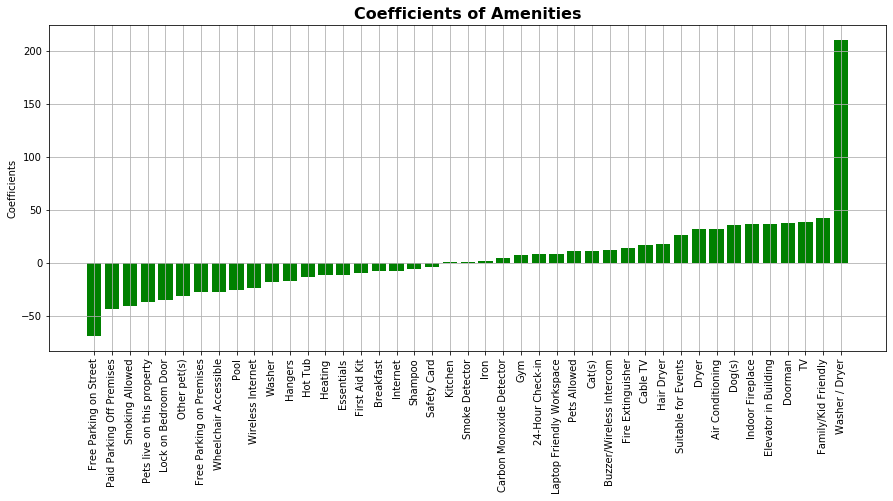

<Figure size 1080x432 with 0 Axes>

In [26]:
plt.rcParams['figure.figsize'] = (15,6)

fig, ax = plt.subplots()
fig = plt.figure(figsize=(15,6))

# ax = fig.add_subplot()
ax.set_facecolor(color= 'white')

ax.bar(coef_table['Amenities'],coef_table['Coefs'], color ='green')

ax.set_xticklabels(coef_table['Amenities'],Rotation=90),
ax.set_ylabel('Coefficients')
ax.set_title('Coefficients of Amenities',fontsize=16,fontweight='bold')
ax.grid()
plt.show()

## Missing Values

In [27]:
columns_with_na = [columns for columns in listings.columns if listings[columns].isna().sum()>1]

for column in columns_with_na:
    print(column,np.round(listings[column].isna().mean(), 4), ' % missing values')

host_response_time 0.1314  % missing values
host_response_rate(%) 0.1314  % missing values
host_acceptance_rate(%) 0.1314  % missing values
neighbourhood 0.1515  % missing values
neighbourhood_group_cleansed 1.0  % missing values
city 0.0006  % missing values
zipcode 0.0106  % missing values
market 0.0039  % missing values
property_type 0.0008  % missing values
bathrooms 0.0039  % missing values
bedrooms 0.0028  % missing values
beds 0.0025  % missing values
square_feet 0.9844  % missing values
weekly_price($) 0.7512  % missing values
monthly_price($) 0.7523  % missing values
security_deposit($) 0.6257  % missing values
cleaning_fee($) 0.3088  % missing values
has_availability 1.0  % missing values
first_review 0.2109  % missing values
last_review 0.2109  % missing values
review_scores_rating 0.2268  % missing values
review_scores_accuracy 0.2296  % missing values
review_scores_cleanliness 0.2282  % missing values
review_scores_checkin 0.2287  % missing values
review_scores_communicati

### Relationship Between Missing Values and Price

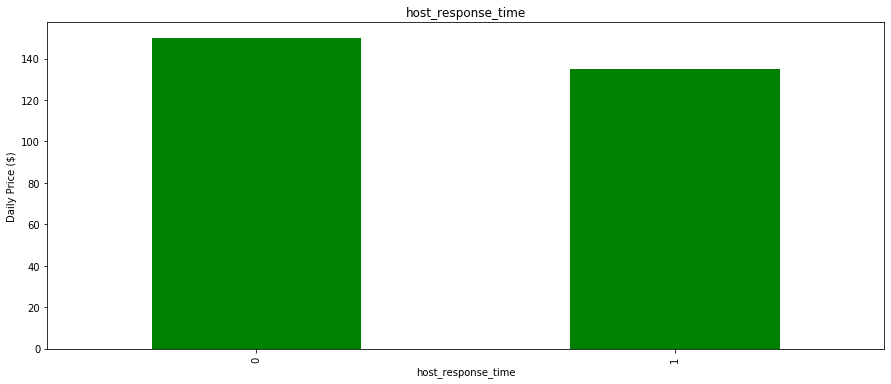

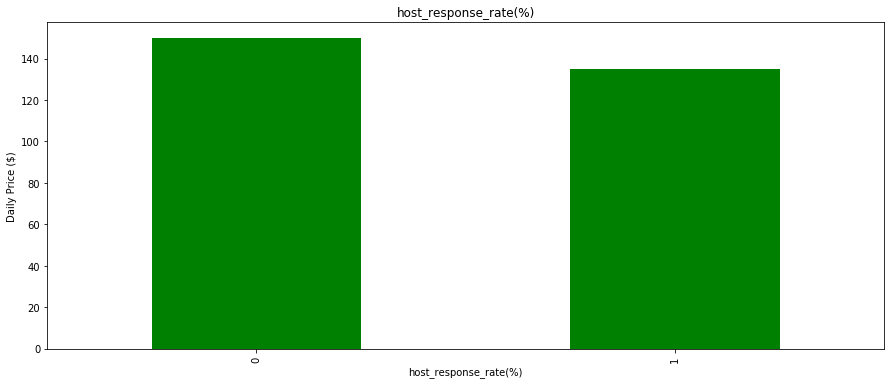

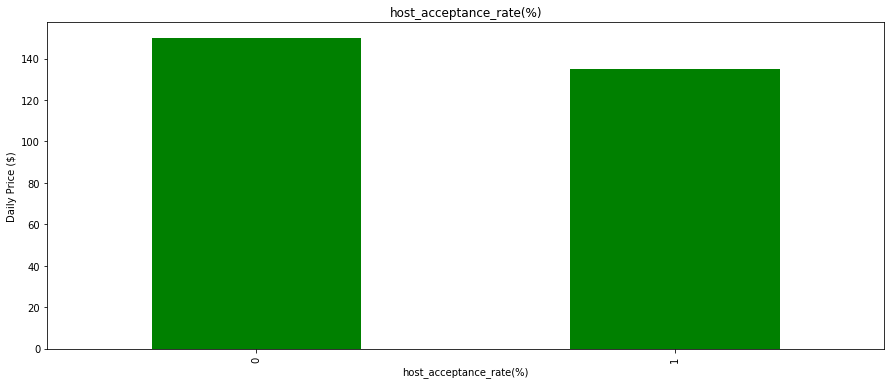

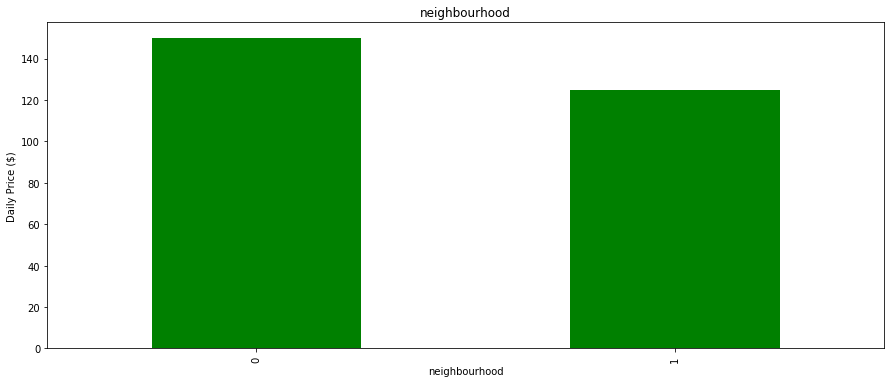

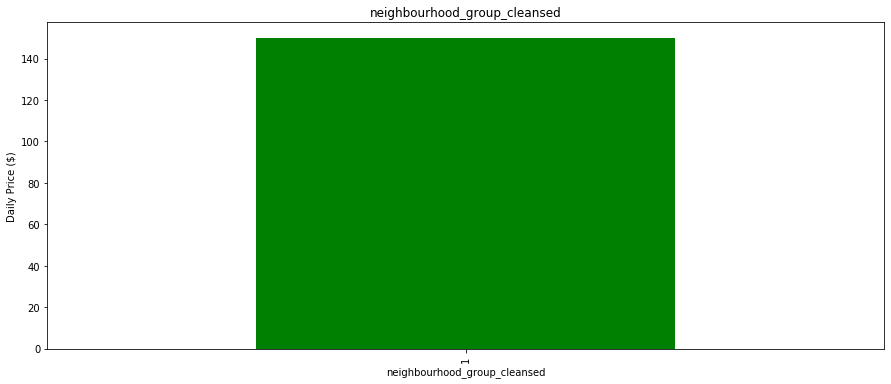

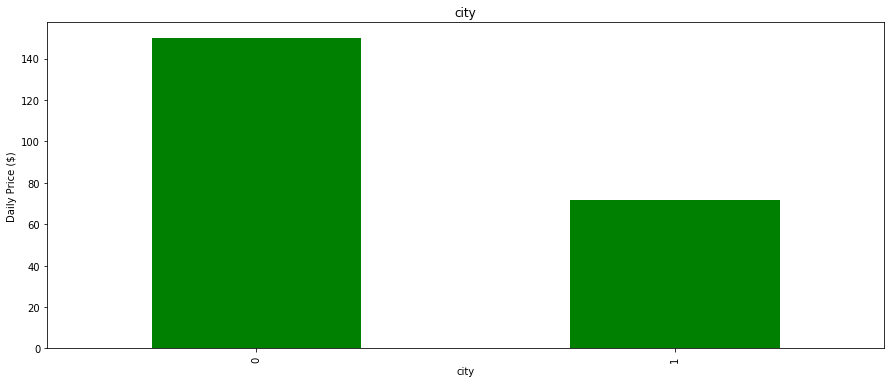

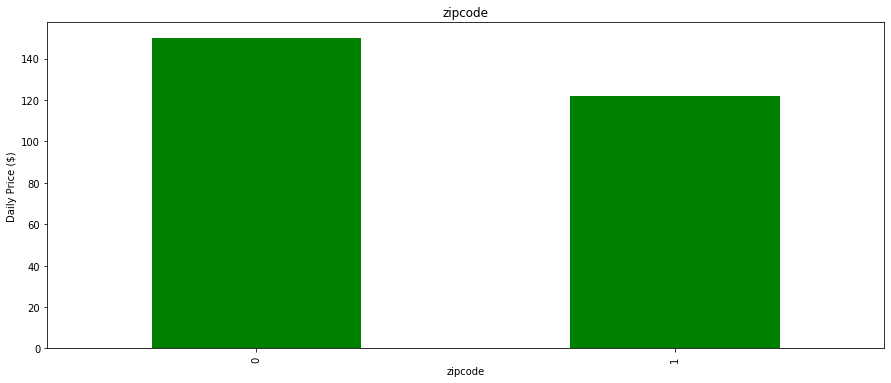

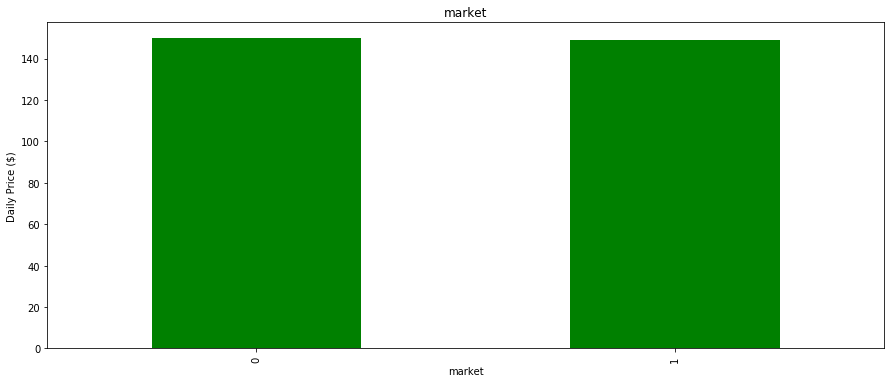

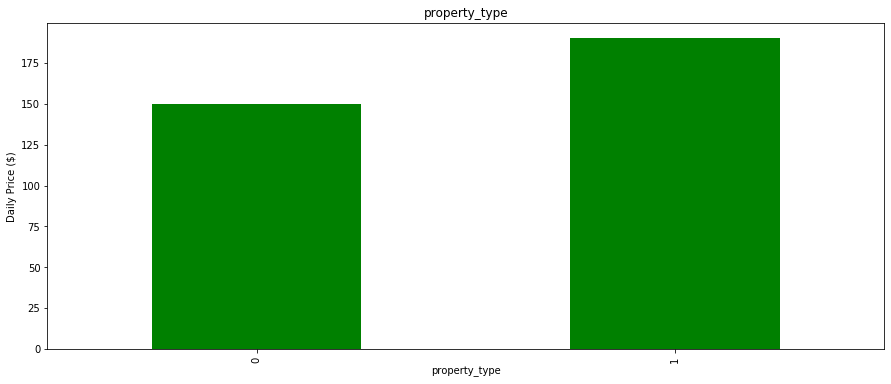

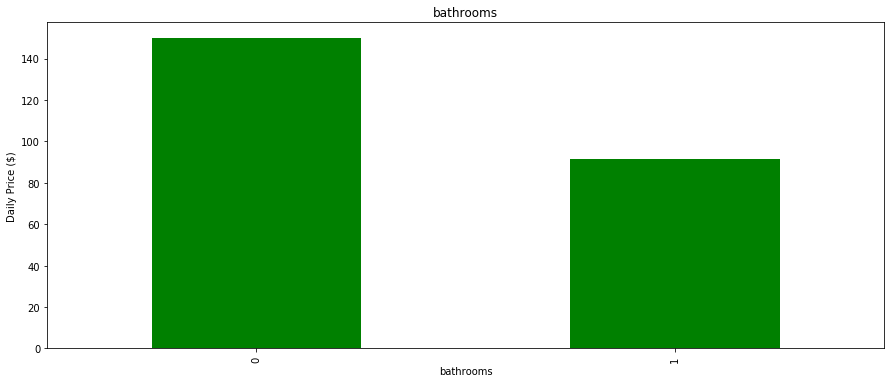

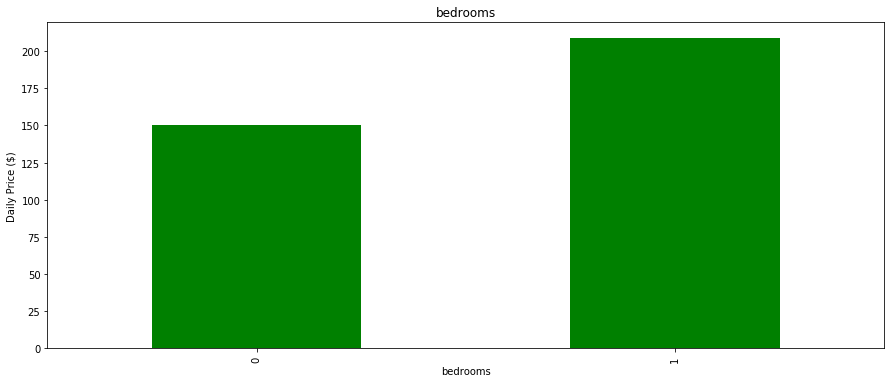

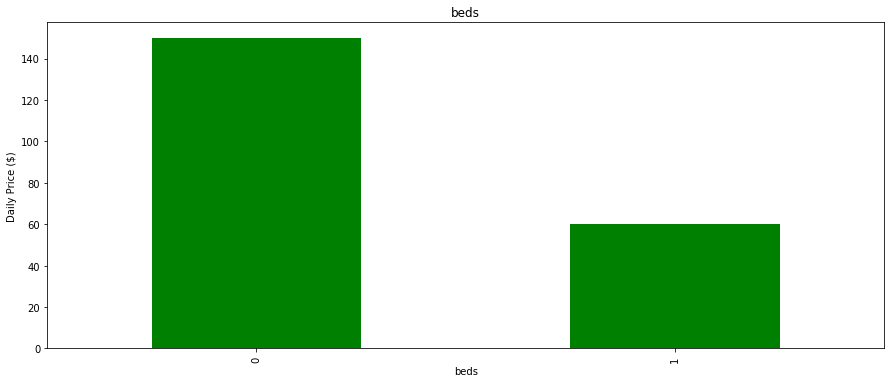

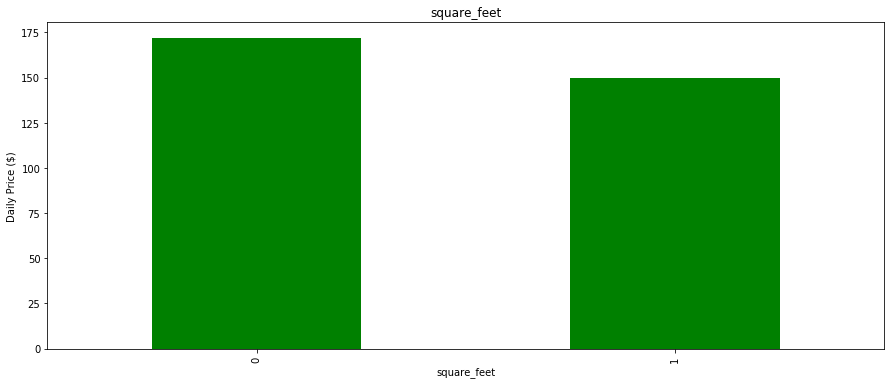

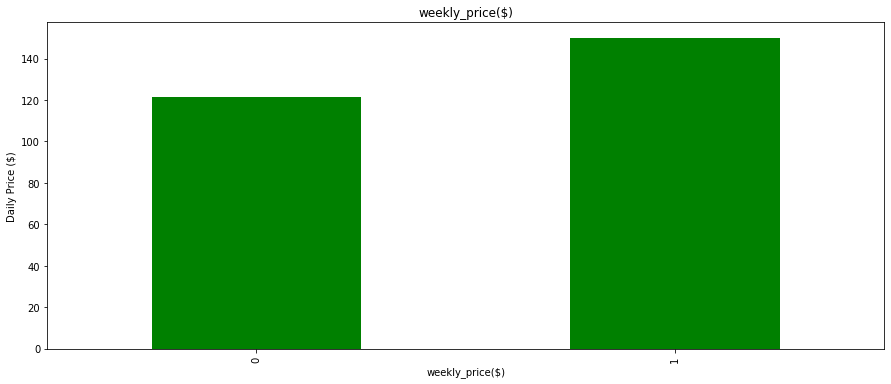

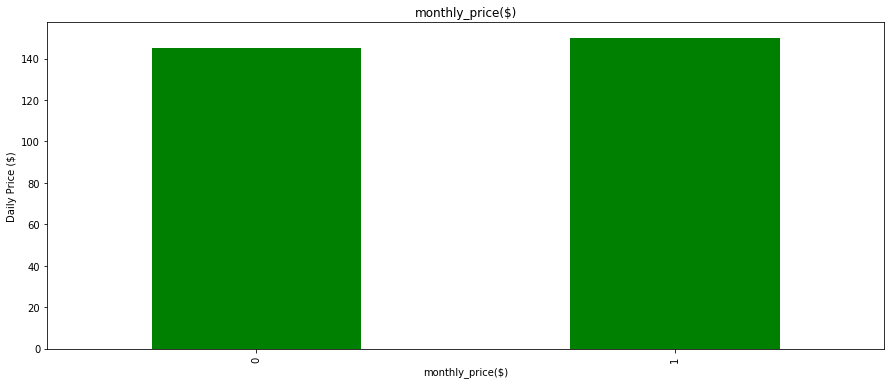

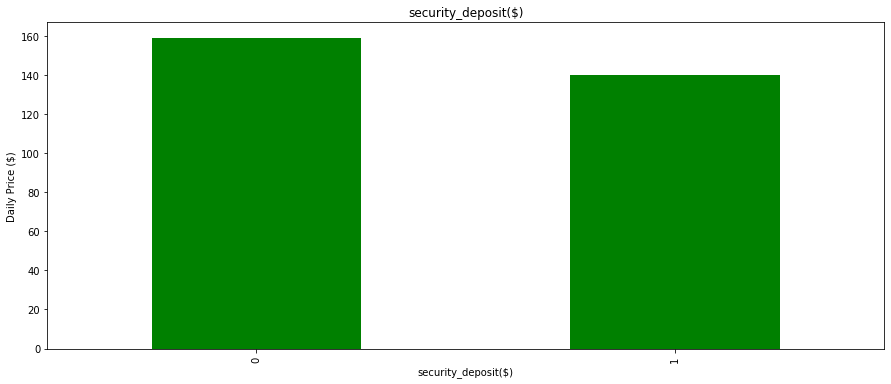

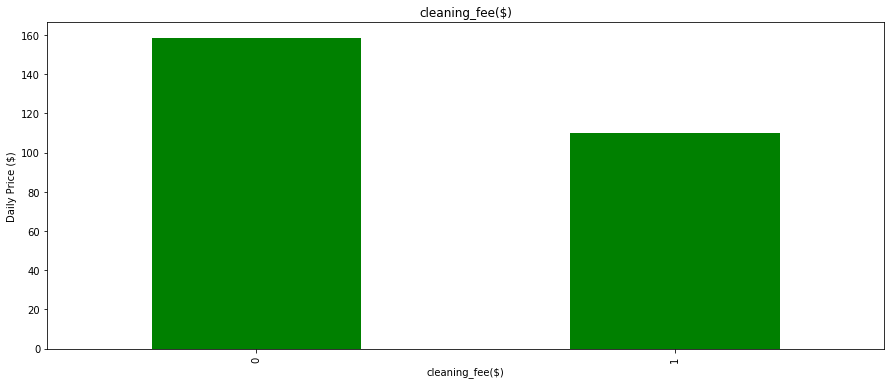

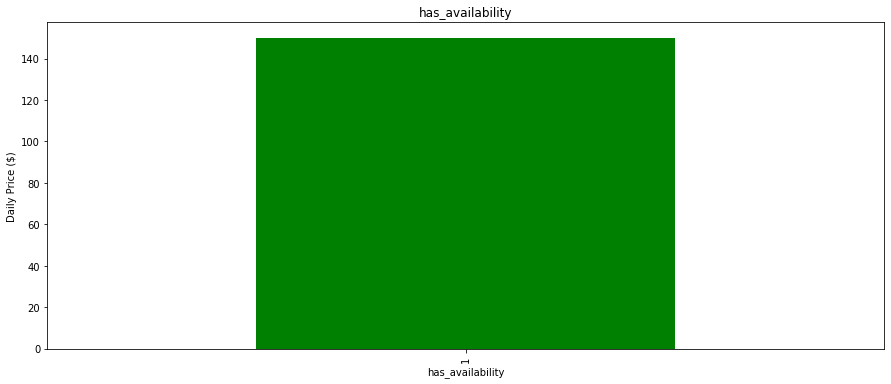

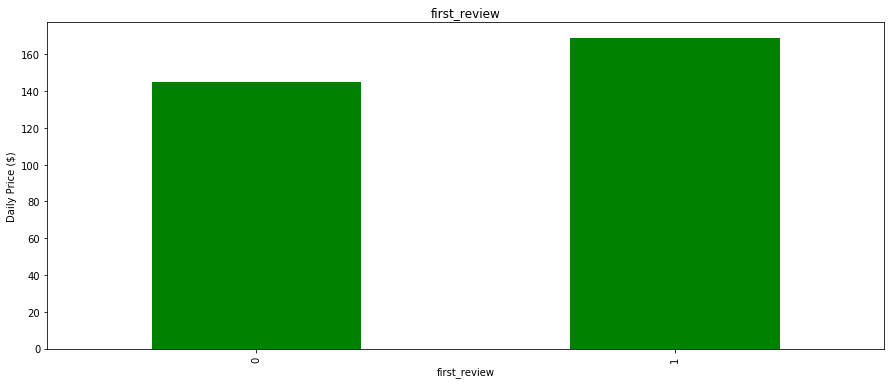

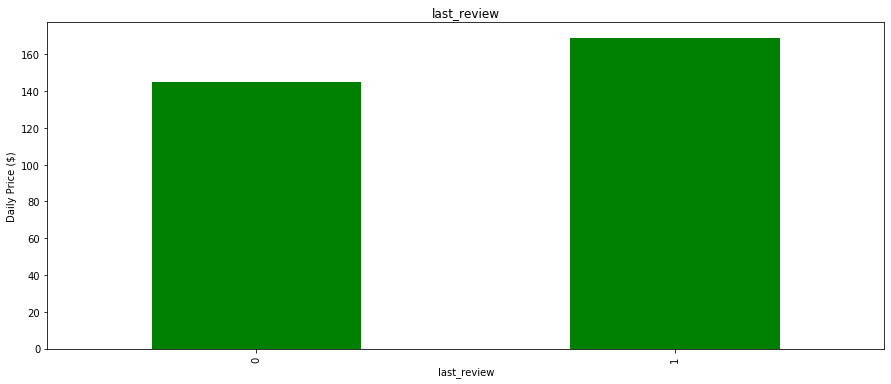

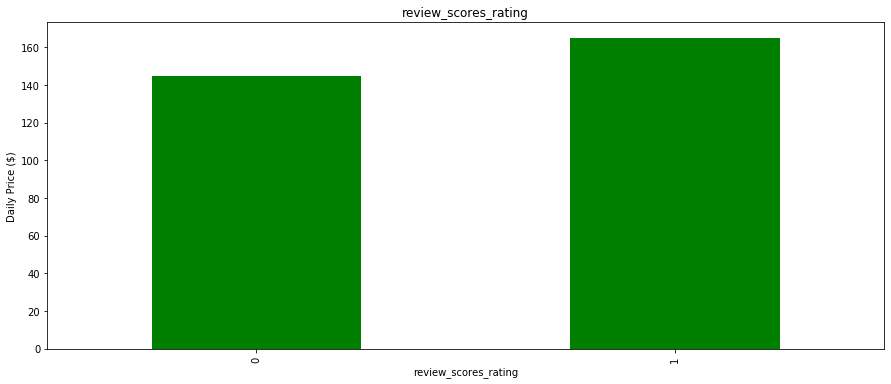

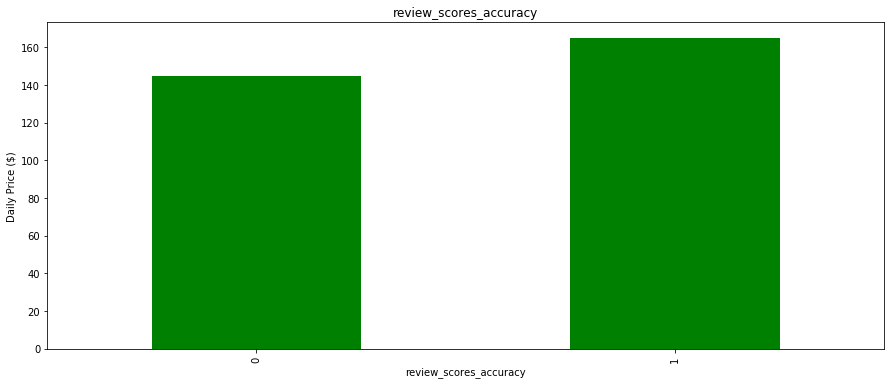

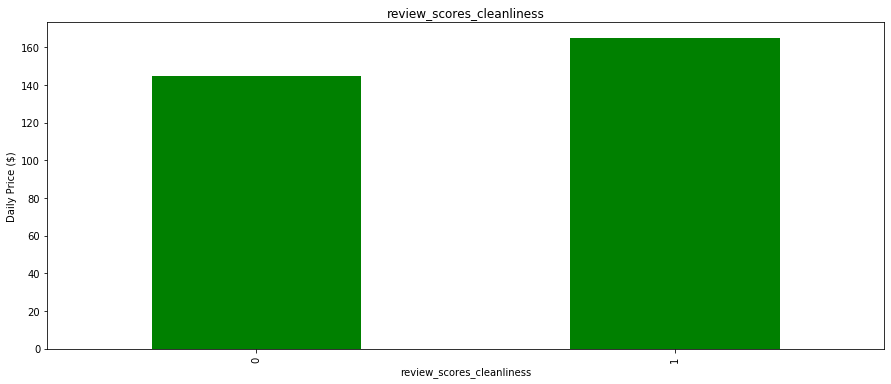

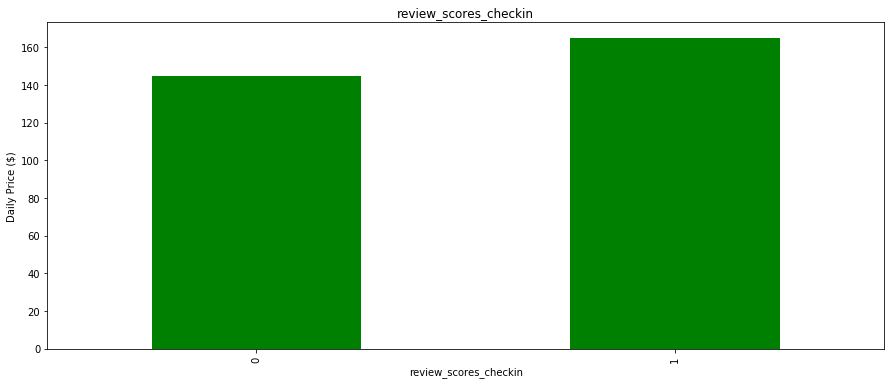

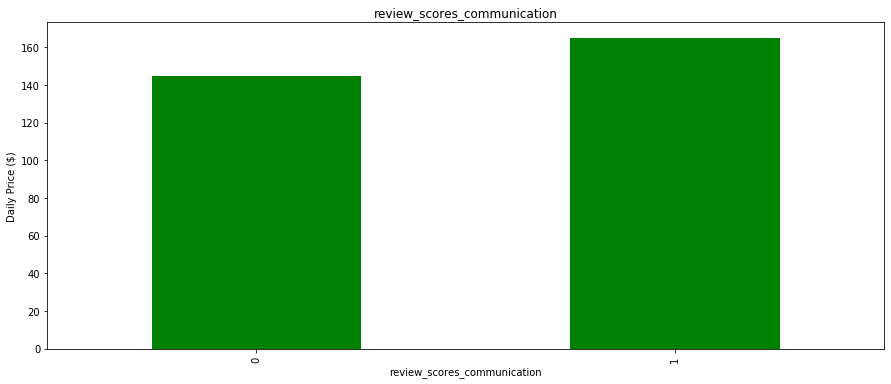

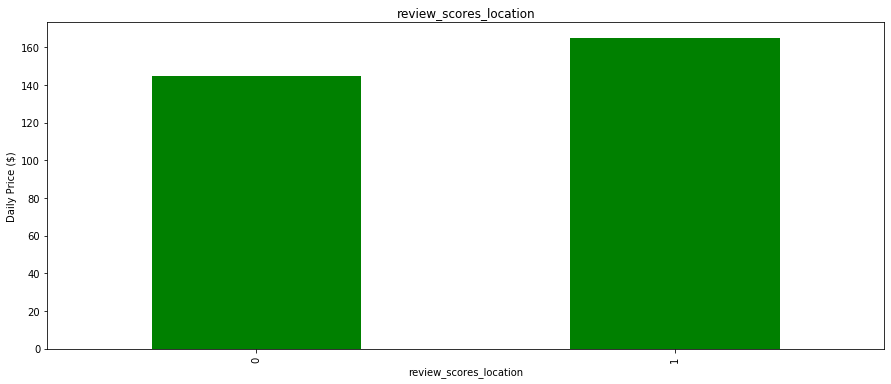

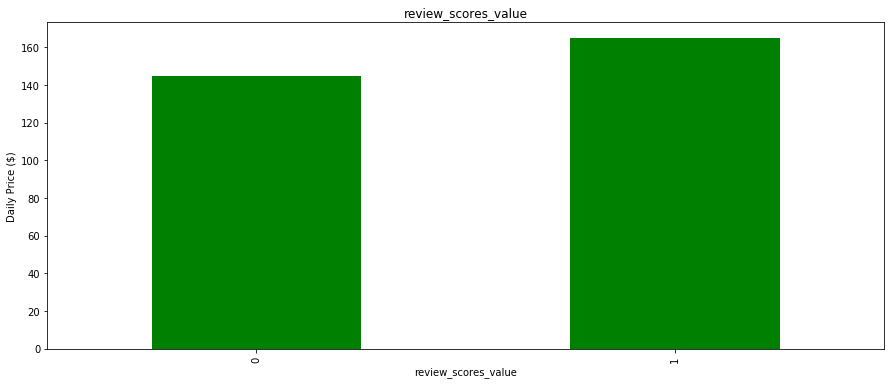

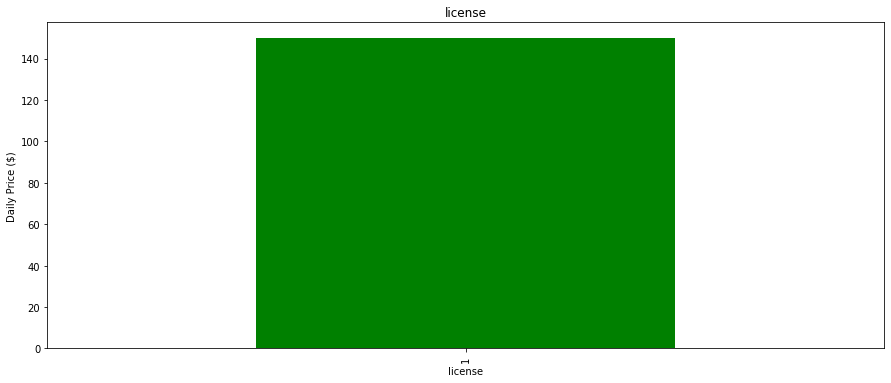

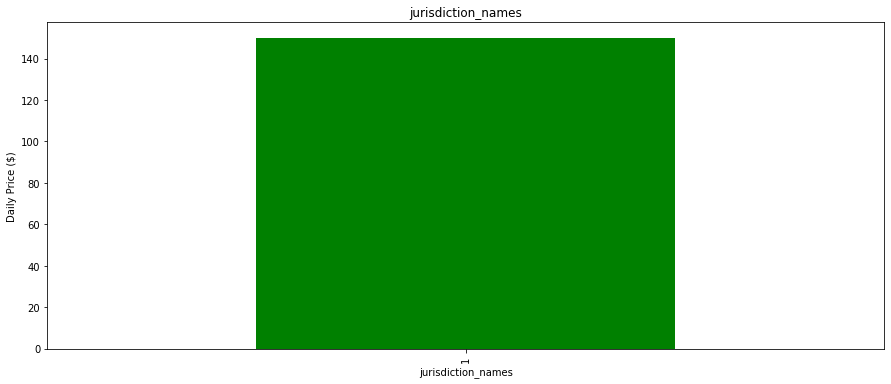

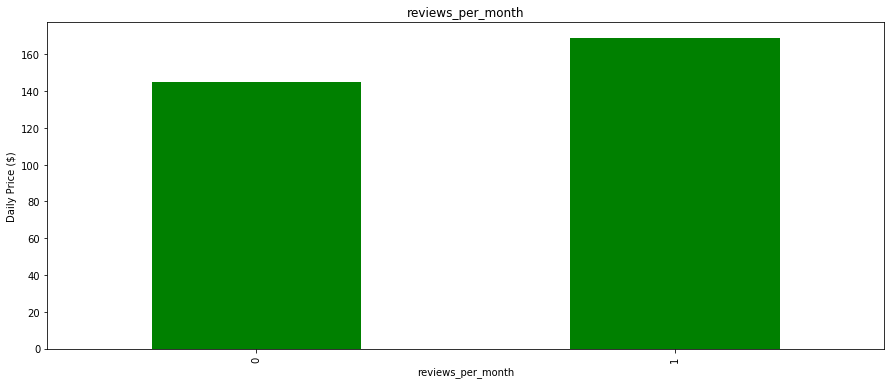

In [28]:
for feature in columns_with_na:
    listings_copy = listings.copy()
    
    # Assign the value of 1 to NULL values and 0 to non NULL values
    listings_copy[feature] = np.where(listings_copy[feature].isna(),1,0)
    
    #Comparison between the median price when values are NULL vs when they are not NULL
    listings_copy.groupby(feature)['price($)'].median().plot.bar(color="green")
    plt.title(feature)
    plt.ylabel('Daily Price ($)')
    plt.show()

### Analyzing the relationship of features with the price: 
To determine which values I can drop or potentially feature engineer, I analyze the difference between the price value in NULL values (0) vs non-NULL values (1). 

#### Of particular interest are the columns:

<b>square_feet:</b> 98% NULL values median price when square foot values are NULL is nearly \\$25 higher per night
<br>
<b>weekly_price:</b> 75% NULL values (median price when weekly_price values are NULL is nearly \\$30 lower per night)
<br>
<b>monthly_price:</b> 75% NULL values (median price when monthly price values are NULL is nearly the same)
<br>
<b>security_deposit:</b> 62% NULL values (median price when security price values are NULL is nearly \\$20 higher)
<br>

<b>Other columns will be dropped due to low to no variation:</b>

<b>neighbourhood_group_cleansed</b> (all NULL values)
<br>
<b>market</b> (99.9\% values are Boston)
<br>
<b>has_availability</b> (all NULL values)
<br>
<b>license</b> (all NULL values)
<br>
<b>jurisdiction_names</b> (all NULL values)

### Data Type Analysis - Numerical Columns

In [29]:
numerical_features = [feature for feature in listings.columns if listings[feature].dtypes != 'O']

print('Number of numerical variables: ',len(numerical_features))

listings[numerical_features].head()

Number of numerical variables:  89


,id,scrape_id,last_scraped,host_id,host_since,host_response_rate(%),host_acceptance_rate(%),host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,...,Washer / Dryer,Iron,Smoking Allowed,Wheelchair Accessible,Pets live on this property,Air Conditioning,Gym,Doorman,Essentials,Paid Parking Off Premises
0,12147973,20160906204935,2016-09-07,31303940,2015-04-15,NaN,NaN,1,1,NaN,...,0,0,0,0,1,0,0,0,1,0
1,3075044,20160906204935,2016-09-07,2572247,2012-06-07,1.0,1.00,1,1,NaN,...,0,1,0,0,1,1,0,0,1,0
2,6976,20160906204935,2016-09-07,16701,2009-05-11,1.0,0.88,1,1,NaN,...,0,0,0,0,0,1,0,0,1,0
3,1436513,20160906204935,2016-09-07,6031442,2013-04-21,1.0,0.50,1,1,NaN,...,0,1,0,0,0,1,1,0,1,0
4,7651065,20160906204935,2016-09-07,15396970,2014-05-11,1.0,1.00,1,1,NaN,...,0,1,0,0,0,1,0,0,1,0


In [30]:
# Removing square_feet, weekly_price, monthly_price, and security_deposit because they have over 50% NULL values
# id and scrape_id have no predictive power
# Other columns are dropped due to low or no variation

numerical_drops = ['square_feet','weekly_price($)','security_deposit($)','monthly_price($)','id','scrape_id','host_id','host_total_listings_count', 'neighbourhood_group_cleansed','has_availability','license','jurisdiction_names']

listings.drop(numerical_drops, axis=1, inplace=True)
listings.drop('market',axis=1,inplace=True)

# Removing elements from the list in case we re-use later

for element in numerical_drops:
    numerical_features.remove(element)

In [31]:
listings.head(3)

,last_scraped,host_since,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,...,Washer / Dryer,Iron,Smoking Allowed,Wheelchair Accessible,Pets live on this property,Air Conditioning,Gym,Doorman,Essentials,Paid Parking Off Premises
0,2016-09-07,2015-04-15,NaN,NaN,NaN,f,1,t,f,Roslindale,...,0,0,0,0,1,0,0,0,1,0
1,2016-09-07,2012-06-07,within an hour,1.0,1.00,f,1,t,t,Roslindale,...,0,1,0,0,1,1,0,0,1,0
2,2016-09-07,2009-05-11,within a few hours,1.0,0.88,t,1,t,t,Roslindale,...,0,0,0,0,0,1,0,0,1,0


#### Separating the Date Columns into a List

In [32]:
listings[date_cols].dtypes # re confirming that the date columns are date type

last_scraped             datetime64[ns]
host_since               datetime64[ns]
calendar_last_scraped    datetime64[ns]
first_review             datetime64[ns]
last_review              datetime64[ns]
dtype: object

### Discrete Variable Analysis

In [33]:
discrete_features = [feature for feature in numerical_features if len(listings[feature].unique()) < 25  ]
print("Total discrete features: {}".format(len(discrete_features)))

Total discrete features: 56


In [34]:
listings[discrete_features].head()

,last_scraped,accommodates,bathrooms,bedrooms,beds,guests_included,calendar_last_scraped,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,...,Washer / Dryer,Iron,Smoking Allowed,Wheelchair Accessible,Pets live on this property,Air Conditioning,Gym,Doorman,Essentials,Paid Parking Off Premises
0,2016-09-07,4,1.5,2.0,3.0,1,2016-09-06,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,1,0
1,2016-09-07,2,1.0,1.0,1.0,0,2016-09-06,10.0,9.0,10.0,...,0,1,0,0,1,1,0,0,1,0
2,2016-09-07,2,1.0,1.0,1.0,1,2016-09-06,10.0,9.0,10.0,...,0,0,0,0,0,1,0,0,1,0
3,2016-09-07,4,1.0,1.0,2.0,2,2016-09-06,10.0,10.0,10.0,...,0,1,0,0,0,1,1,0,1,0
4,2016-09-07,2,1.5,1.0,2.0,1,2016-09-06,10.0,10.0,10.0,...,0,1,0,0,0,1,0,0,1,0


In [35]:
for feature in discrete_features:
    print( feature+ " has {} percent NULL values".format(listings[feature].isna().sum()/len(listings[feature])*100))

last_scraped has 0.0 percent NULL values
accommodates has 0.0 percent NULL values
bathrooms has 0.3905160390516039 percent NULL values
bedrooms has 0.2789400278940028 percent NULL values
beds has 0.2510460251046025 percent NULL values
guests_included has 0.0 percent NULL values
calendar_last_scraped has 0.0 percent NULL values
review_scores_accuracy has 22.95676429567643 percent NULL values
review_scores_cleanliness has 22.817294281729428 percent NULL values
review_scores_checkin has 22.87308228730823 percent NULL values
review_scores_communication has 22.817294281729428 percent NULL values
review_scores_location has 22.92887029288703 percent NULL values
review_scores_value has 22.90097629009763 percent NULL values
Wireless Internet has 0.0 percent NULL values
Hair Dryer has 0.0 percent NULL values
Breakfast has 0.0 percent NULL values
Free Parking on Street has 0.0 percent NULL values
Cable TV has 0.0 percent NULL values
Pool has 0.0 percent NULL values
Heating has 0.0 percent NULL va

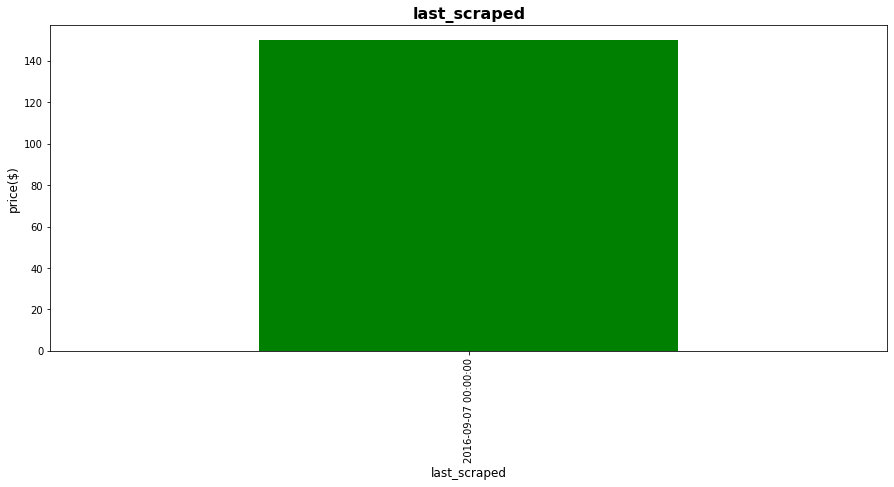

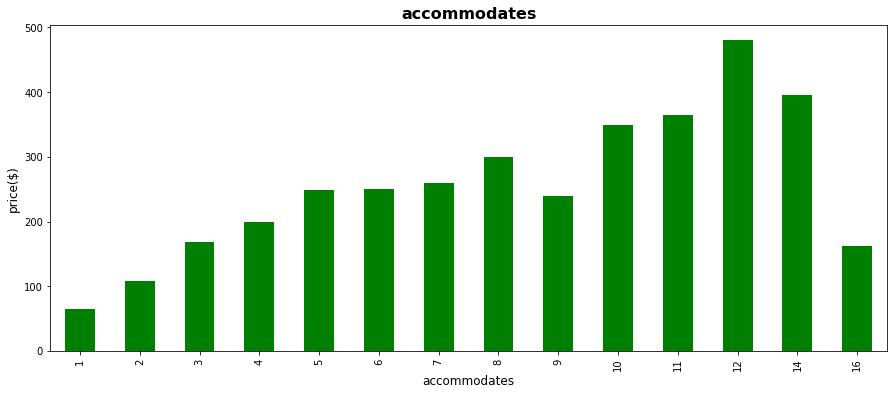

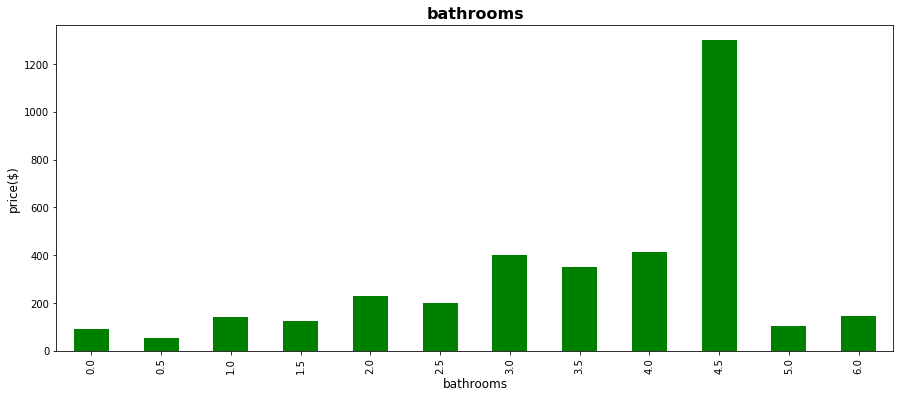

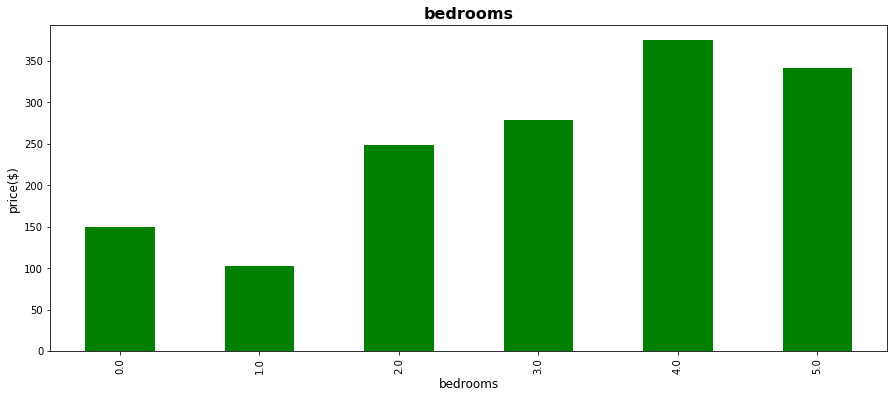

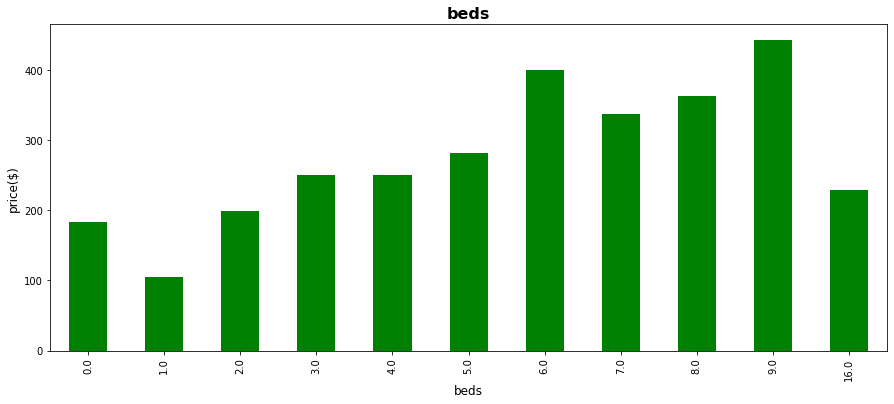

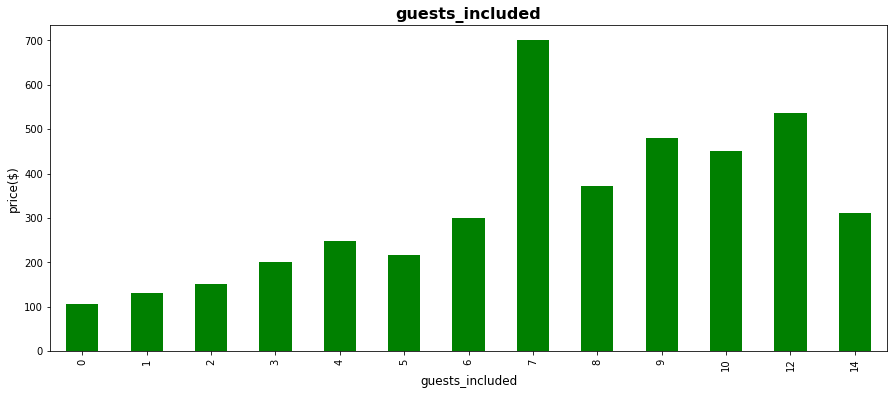

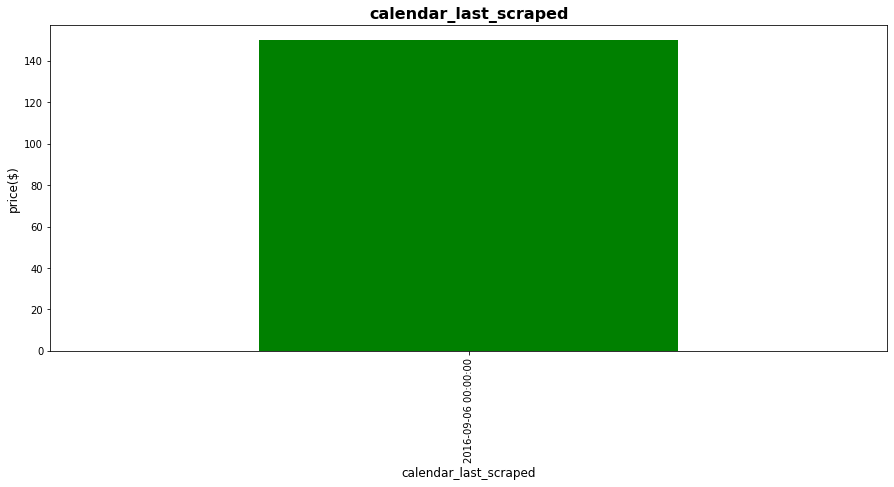

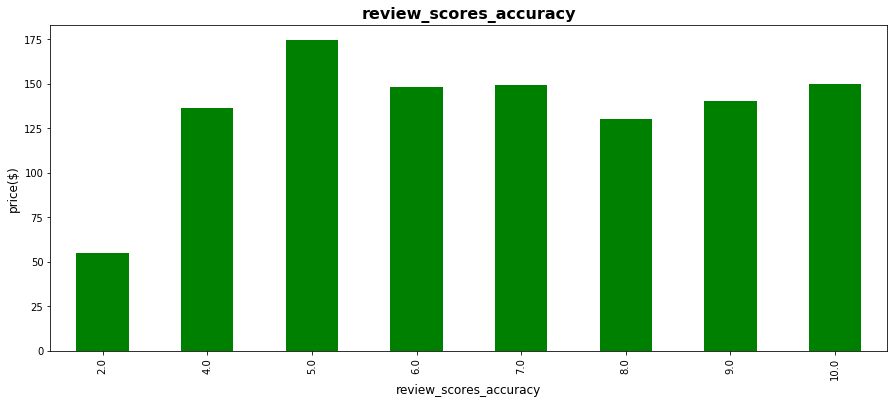

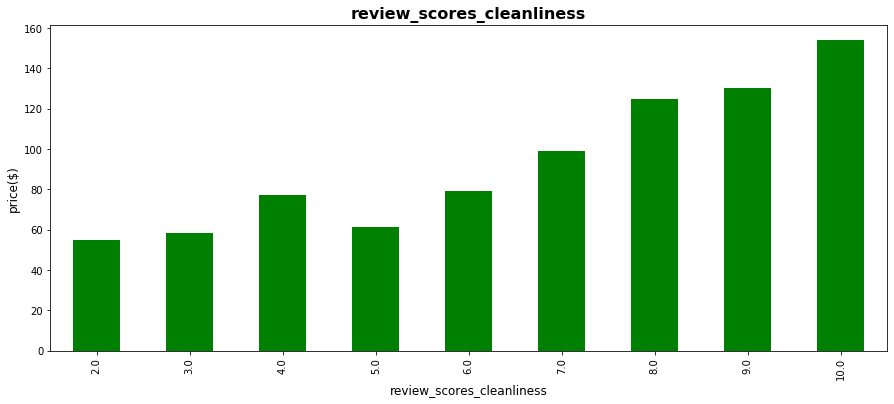

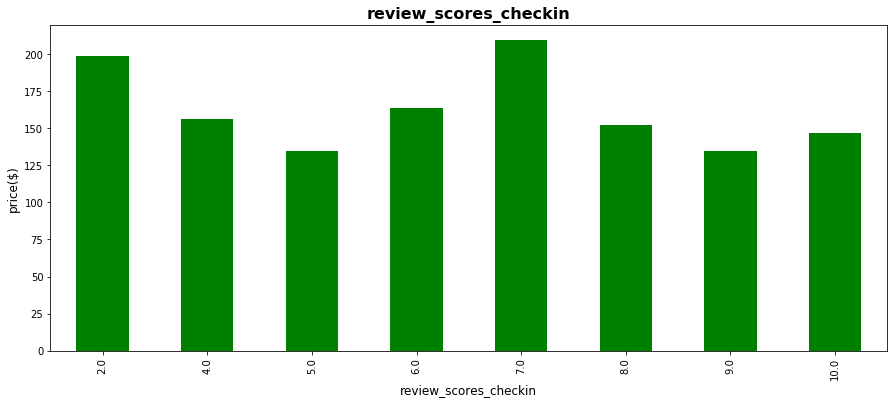

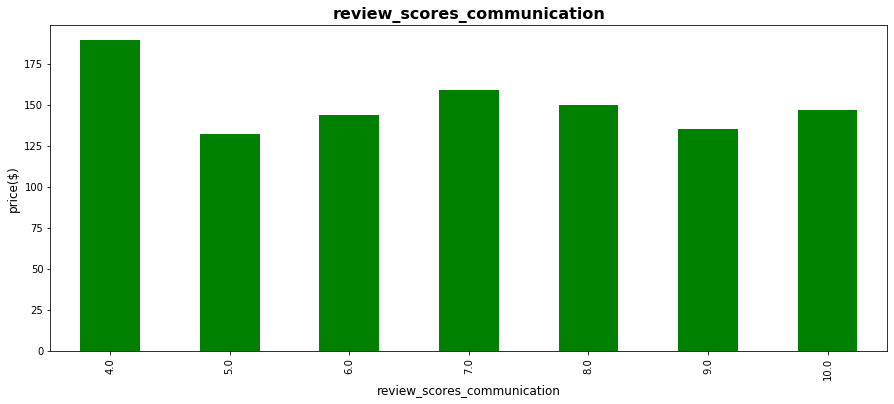

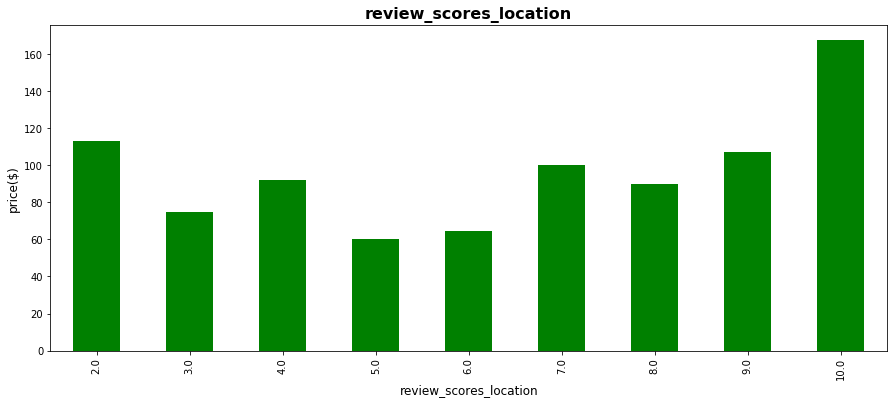

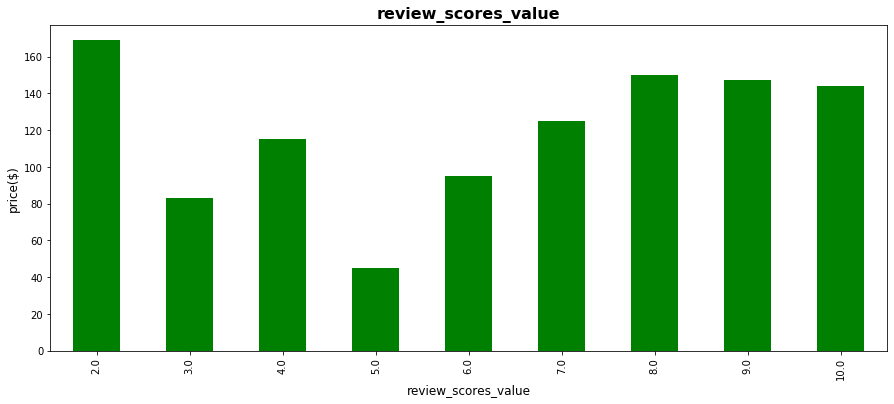

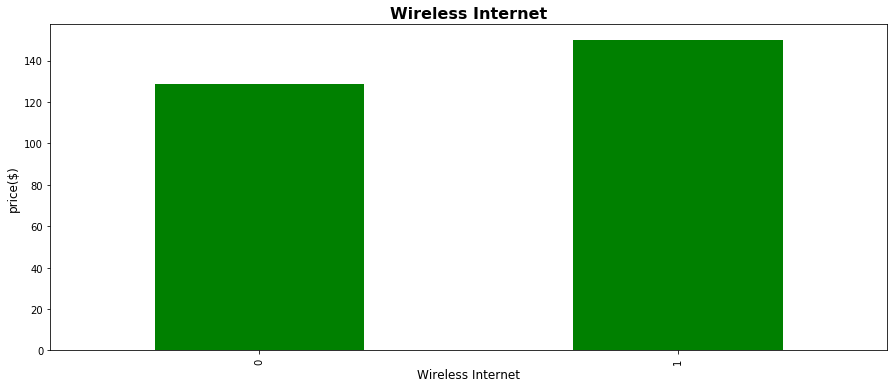

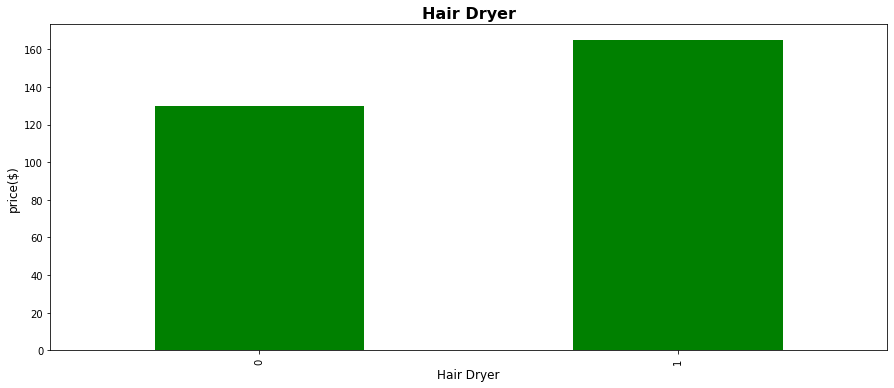

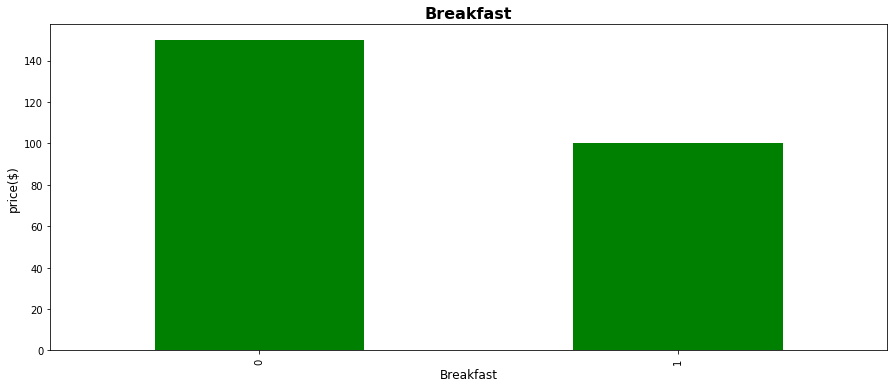

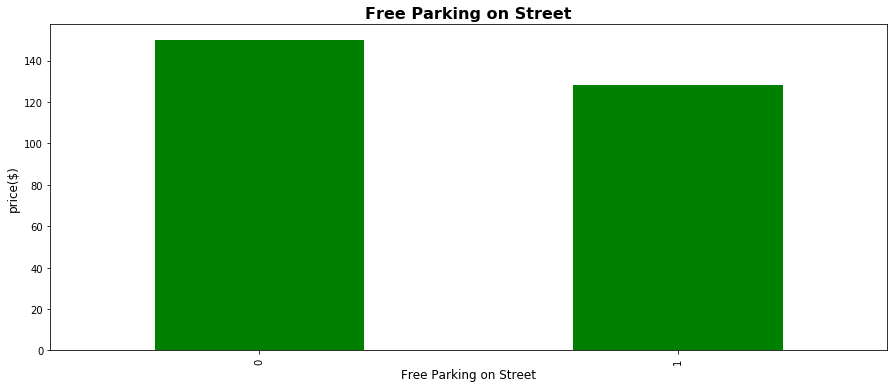

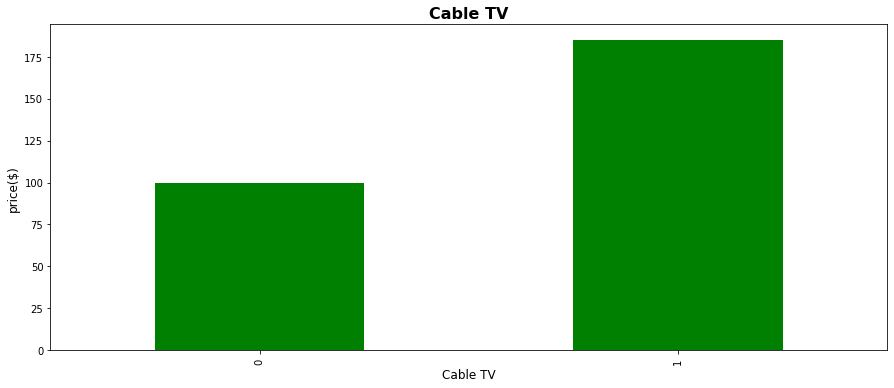

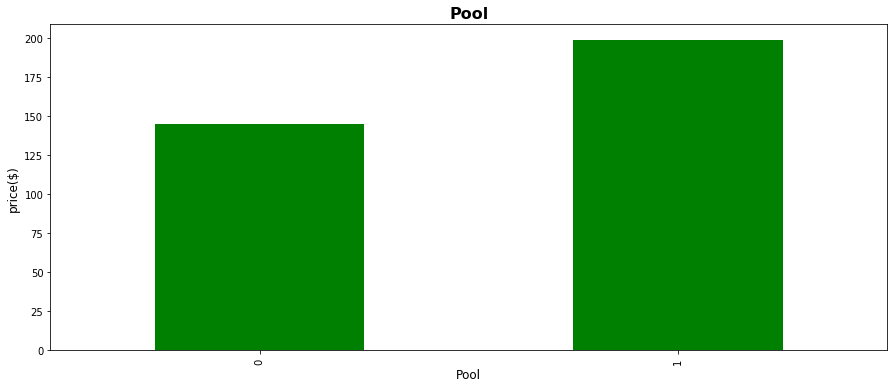

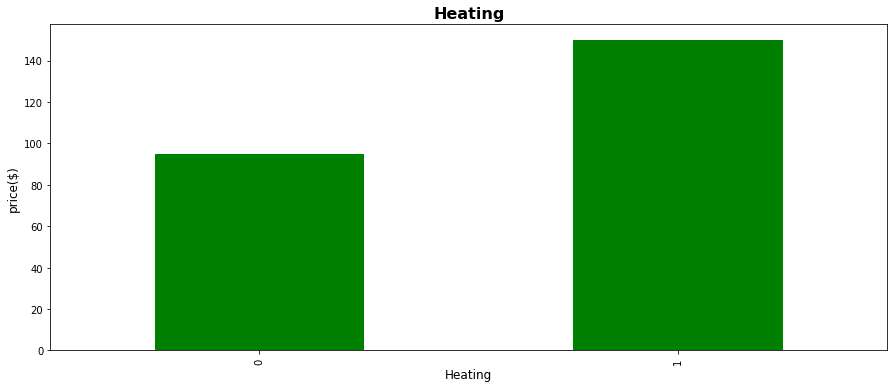

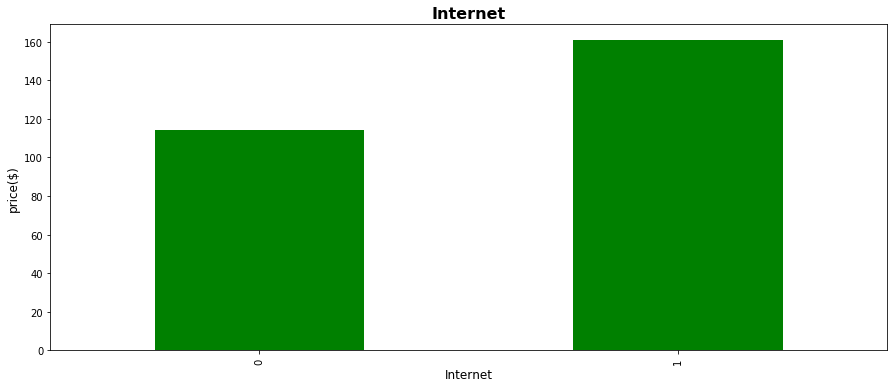

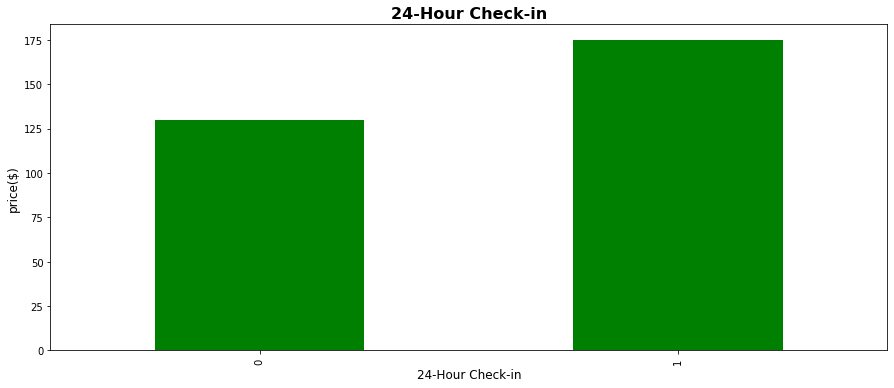

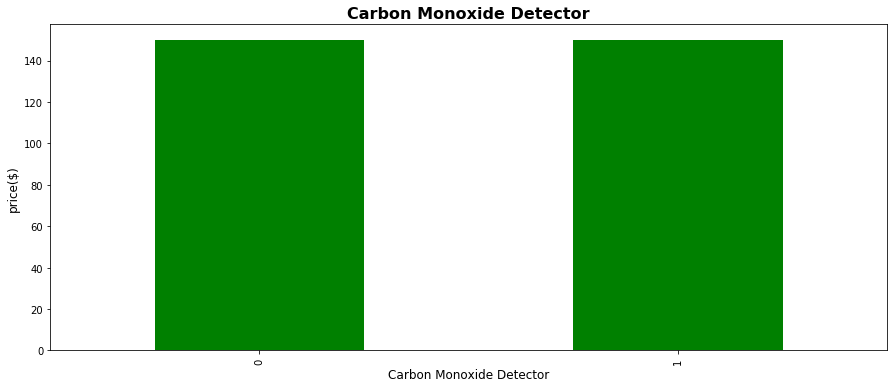

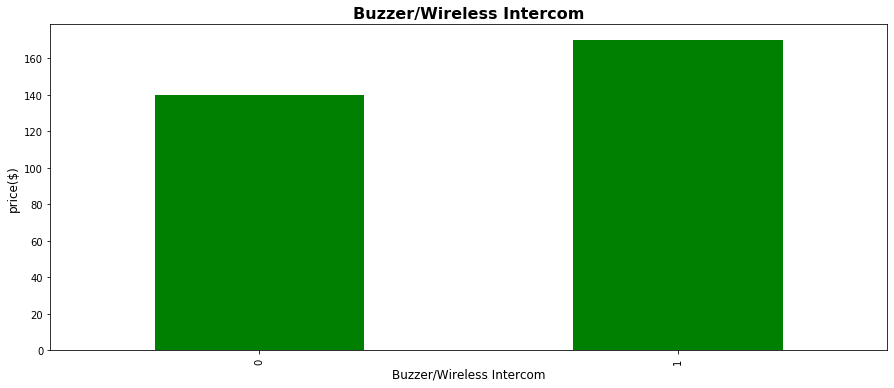

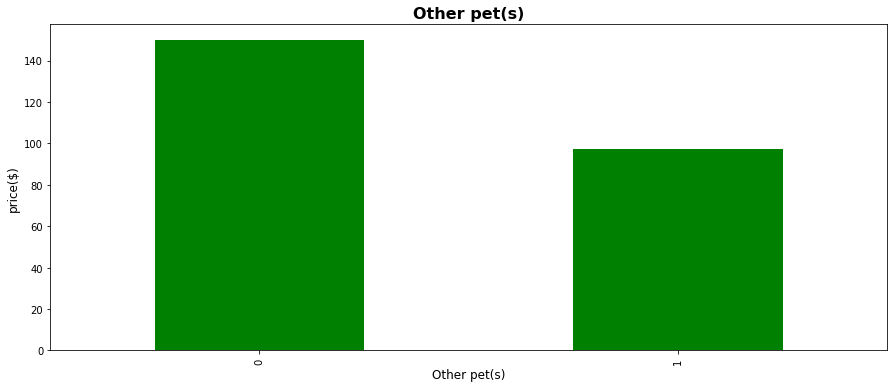

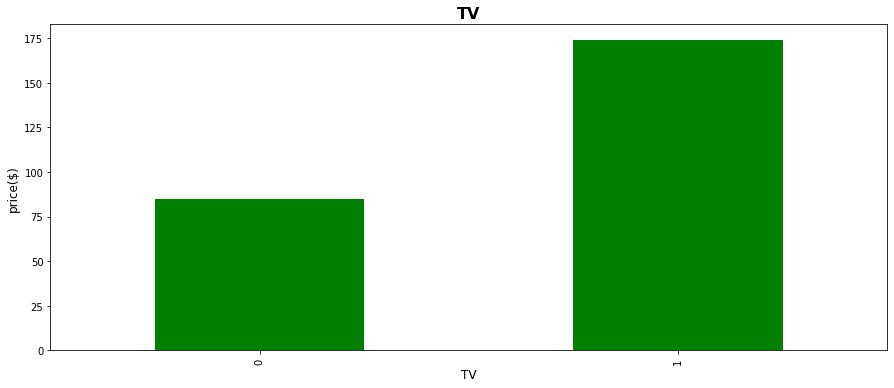

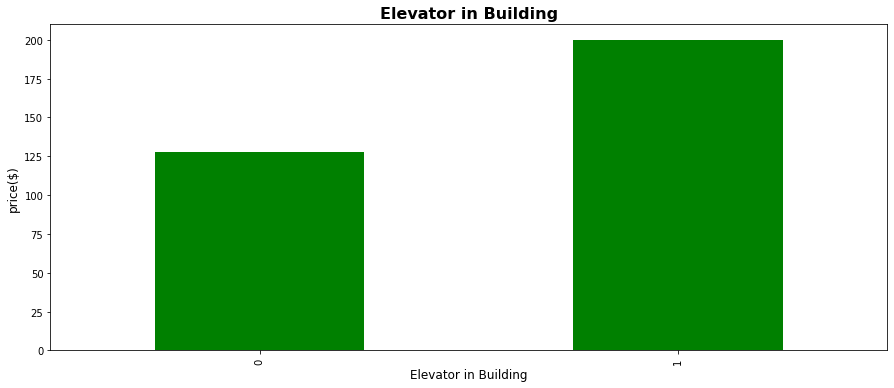

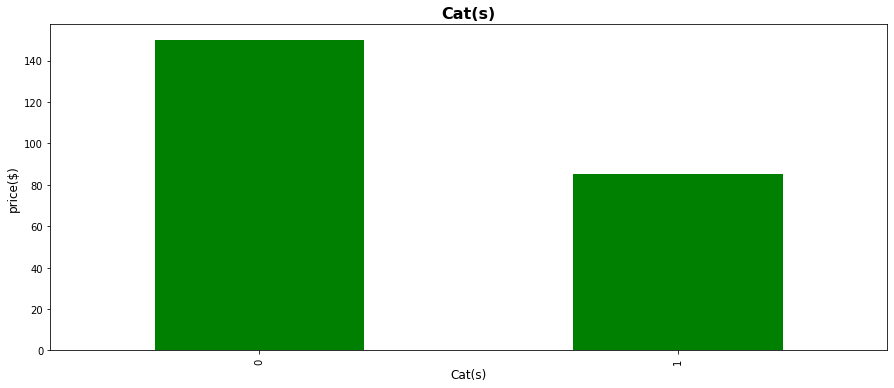

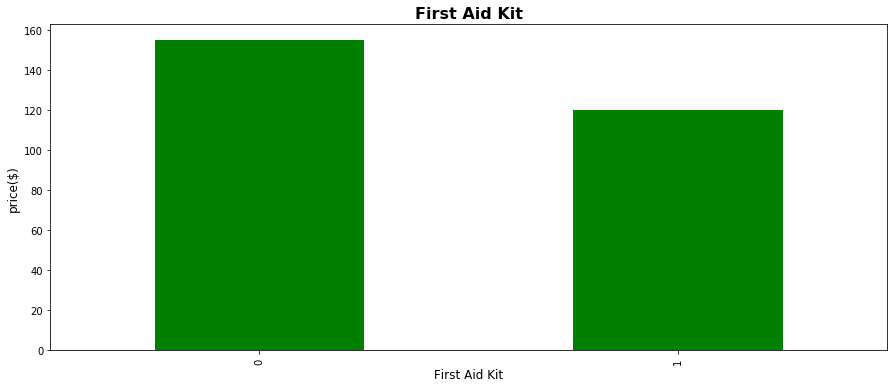

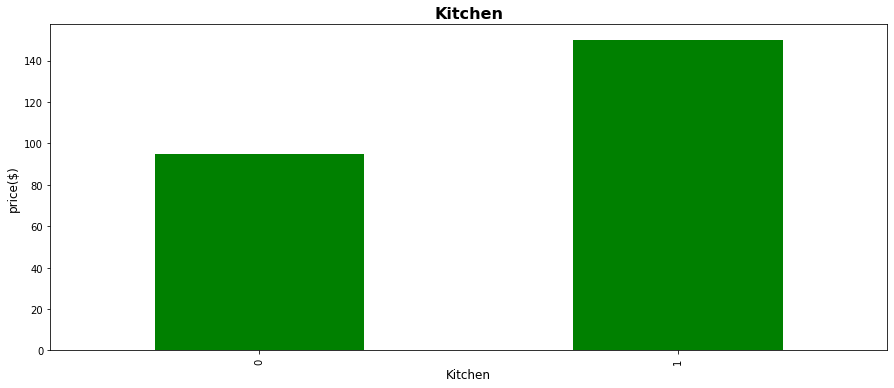

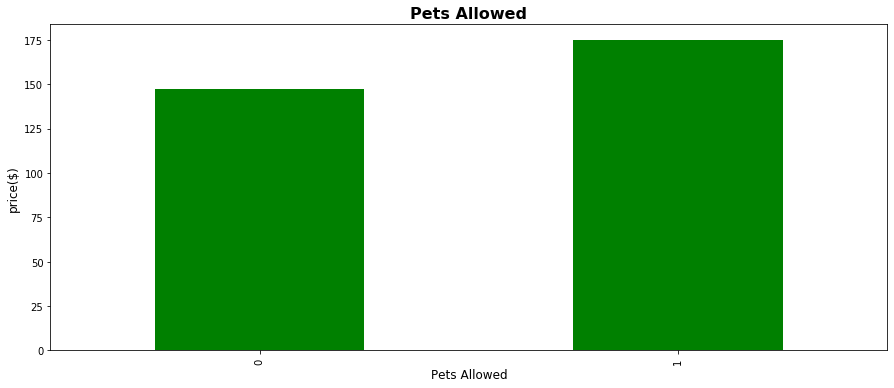

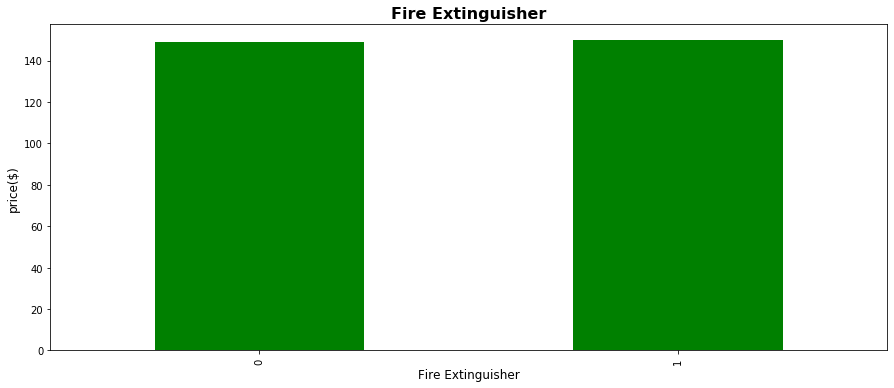

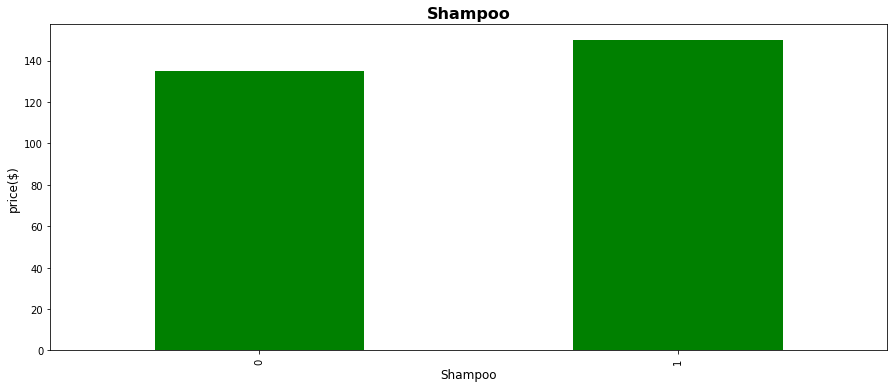

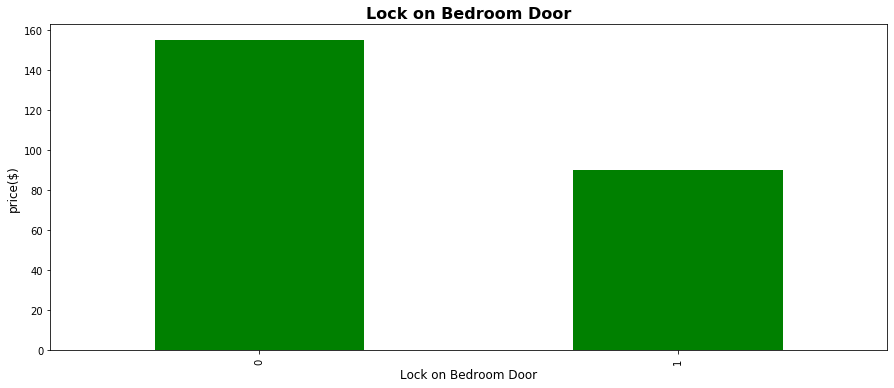

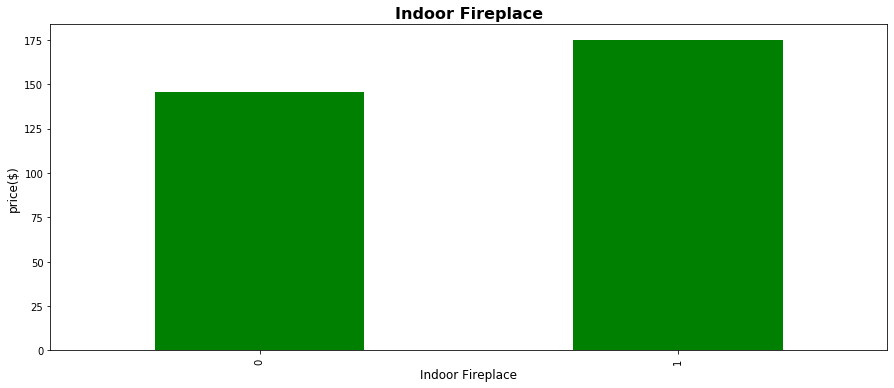

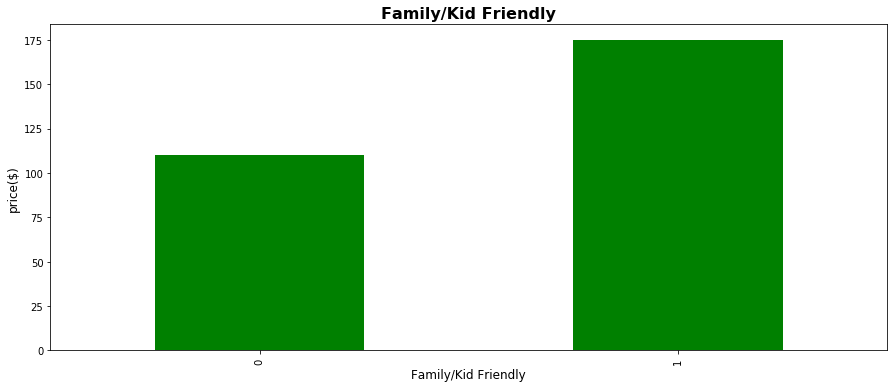

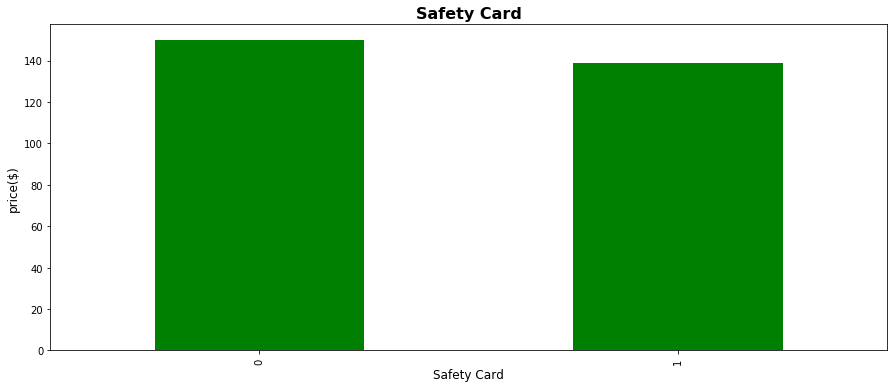

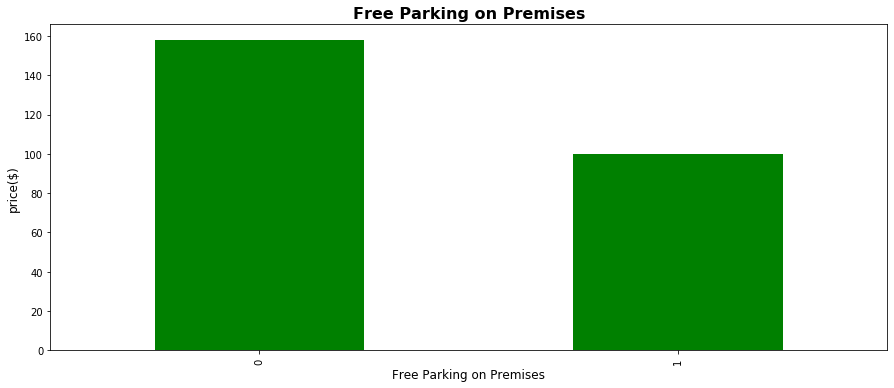

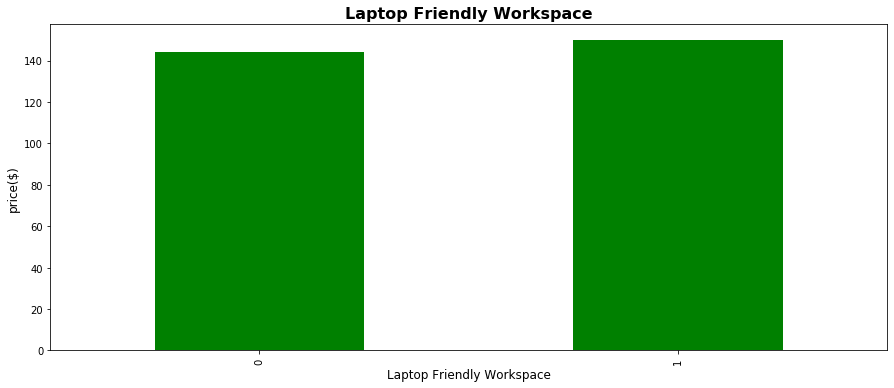

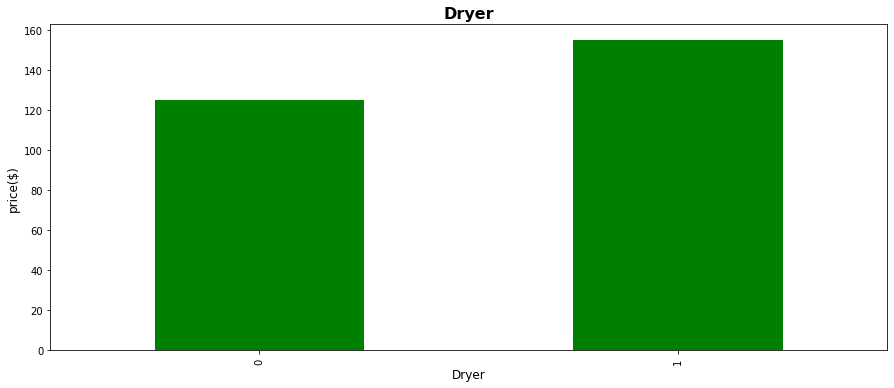

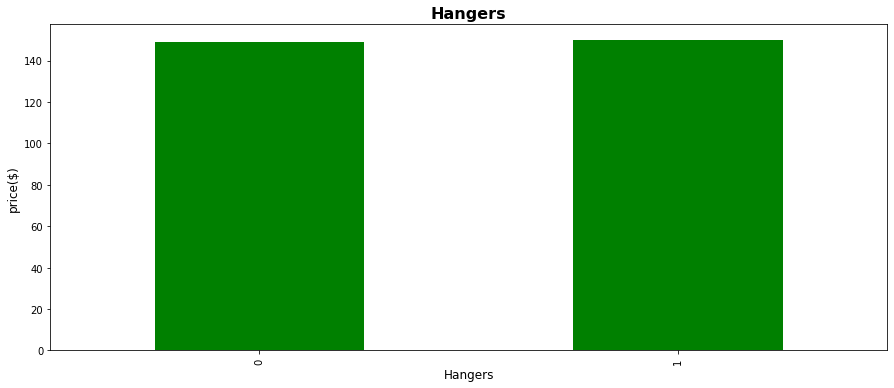

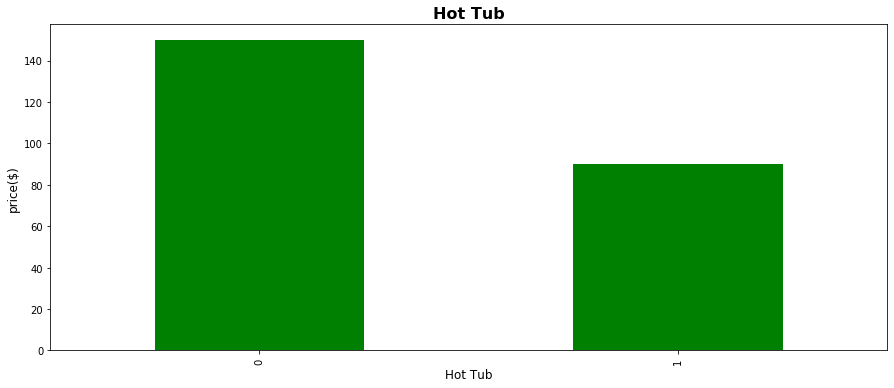

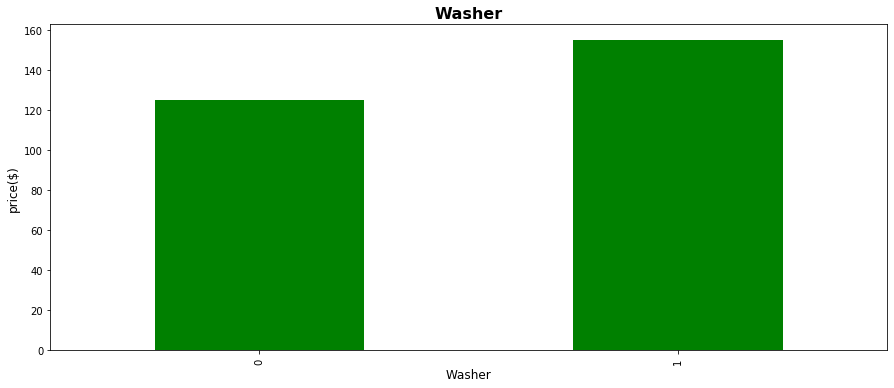

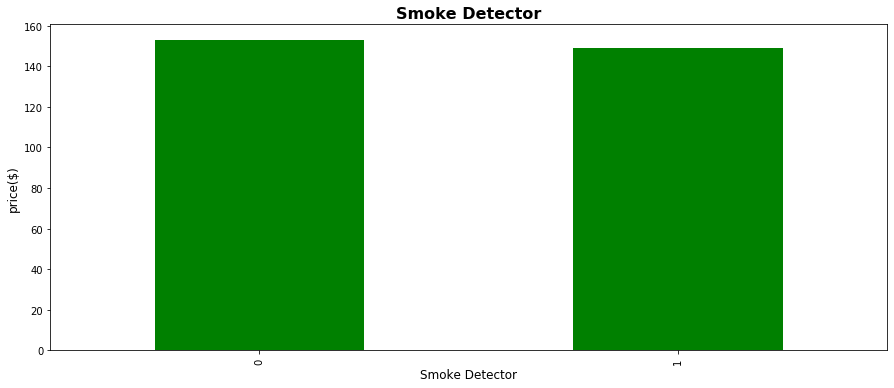

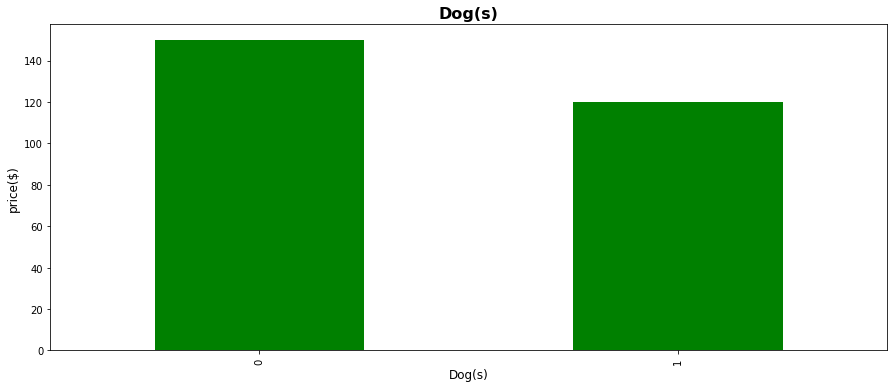

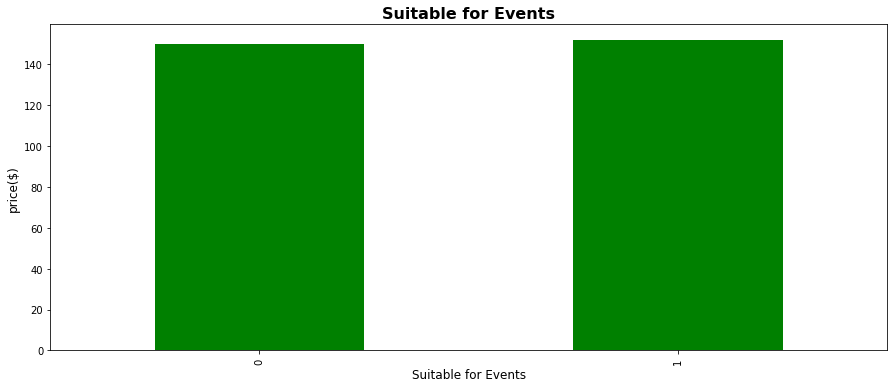

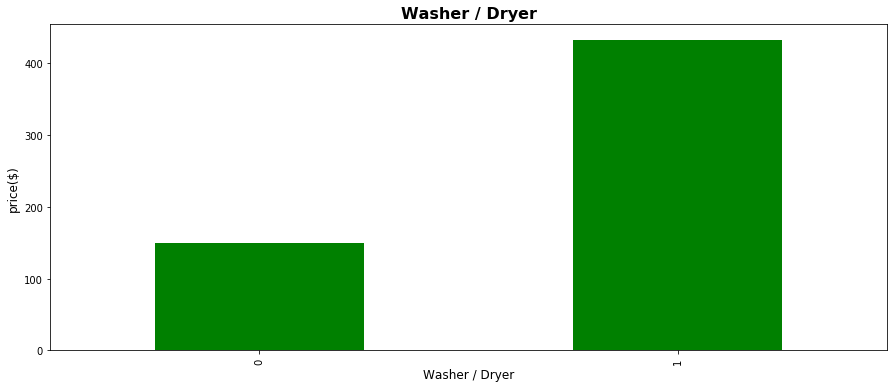

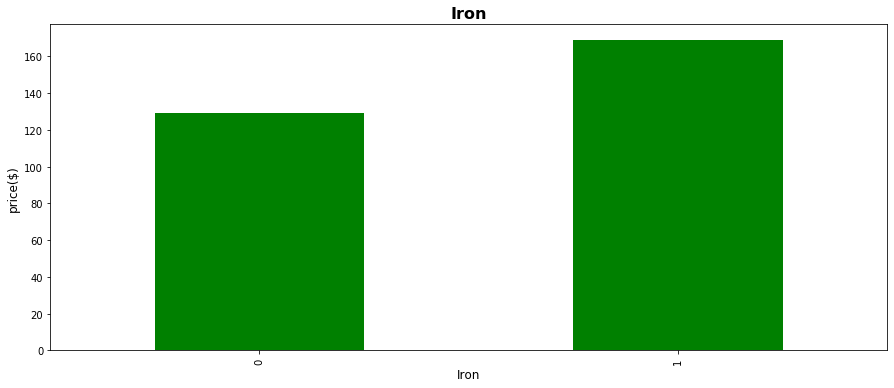

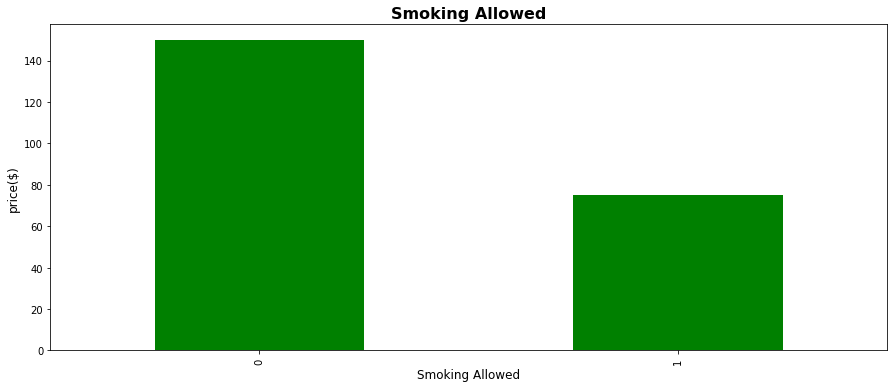

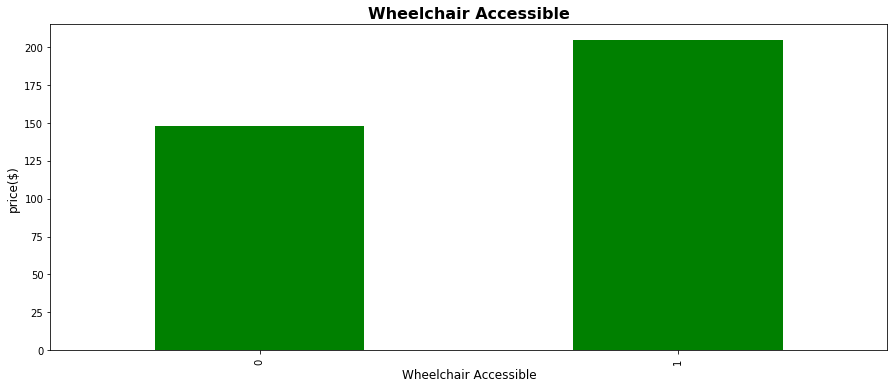

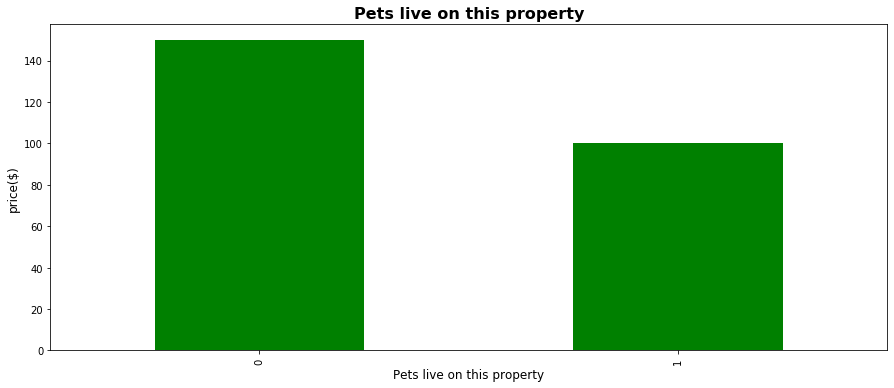

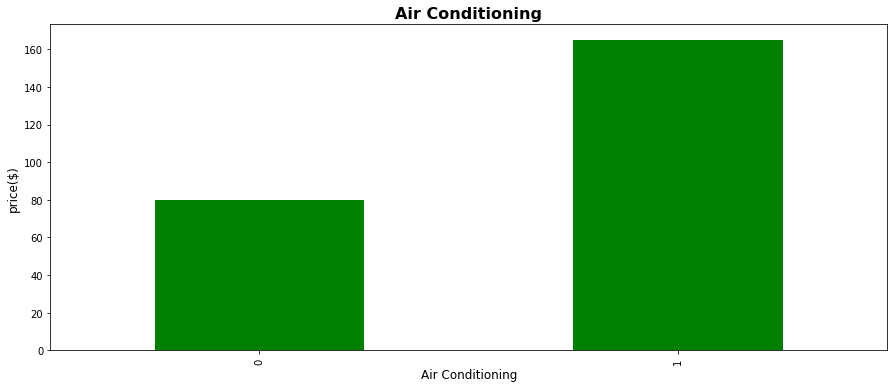

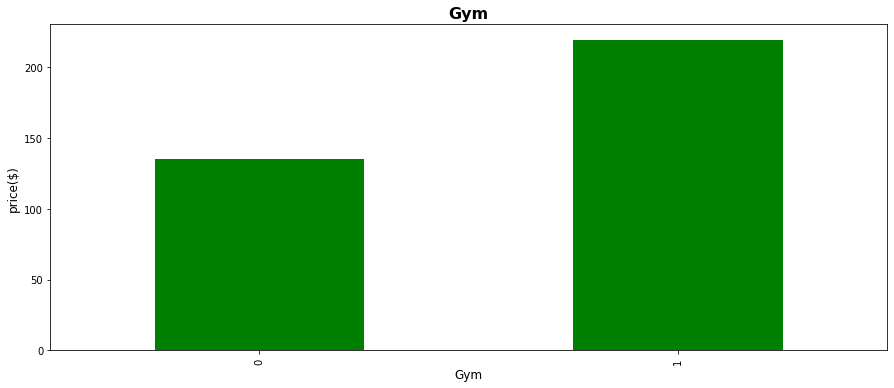

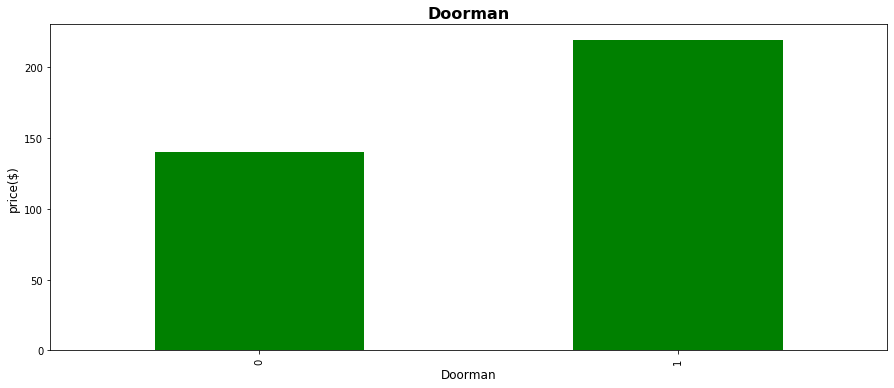

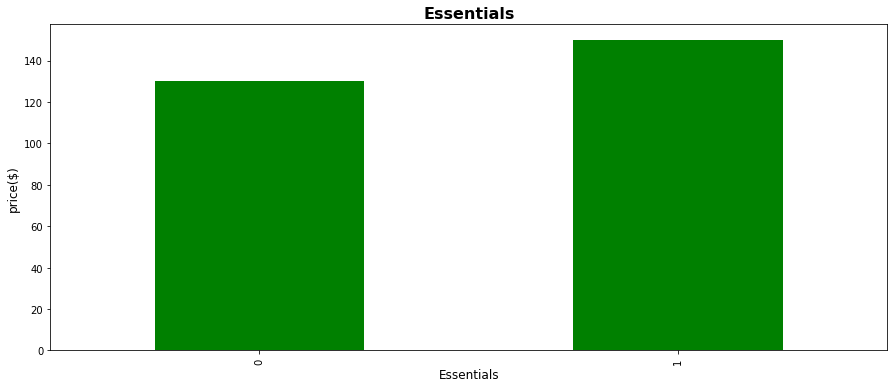

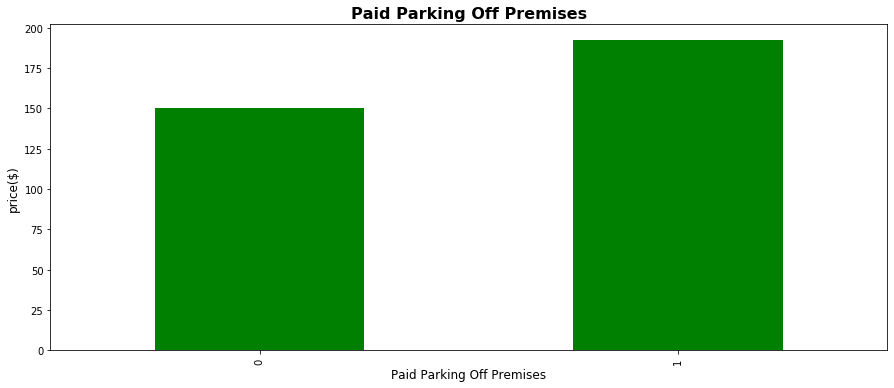

In [36]:
for feature in discrete_features:
    listings_copy = listings.copy()
    listings_copy.groupby(feature)['price($)'].median().plot.bar(color="green")
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('price($)',fontsize=12)
    plt.title(feature, fontsize=16,fontweight='bold')
    plt.show()

### Continuous Variable Analysis

In [37]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_features +['host_since']+['calendar_updated']+['first_review']+['last_review']]
print("continuous feature count {} ".format(len(continuous_feature)))

continuous feature count 18 


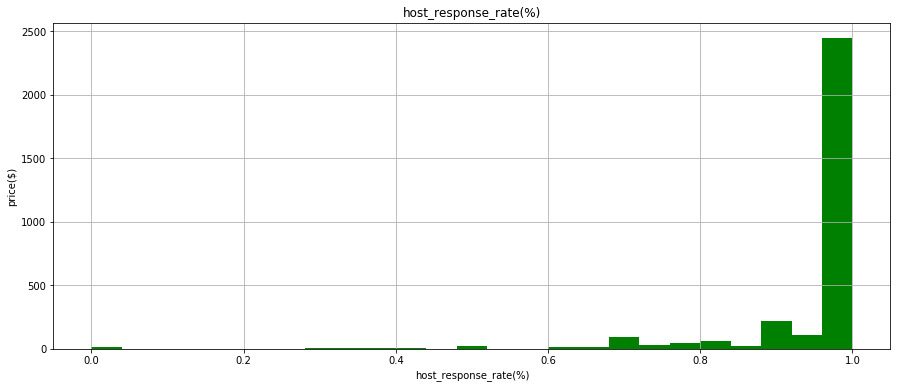

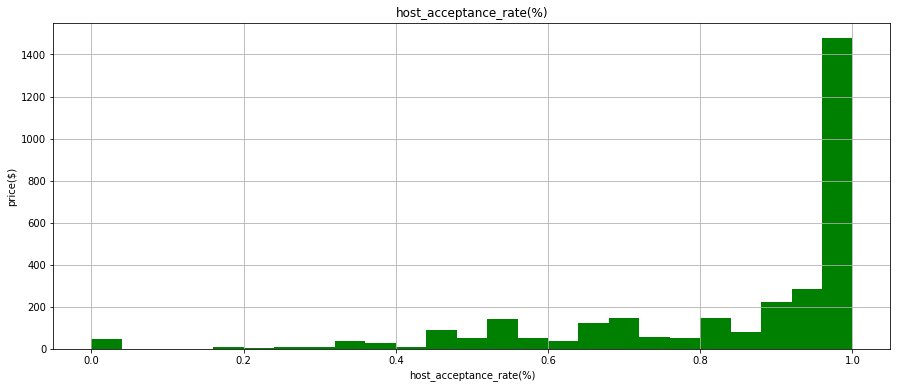

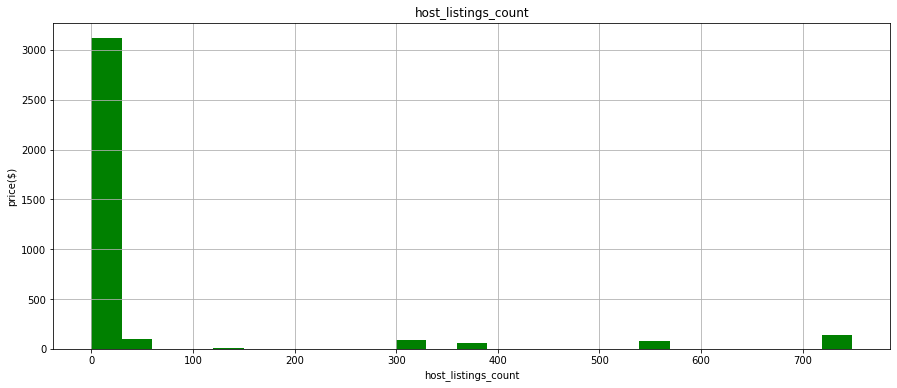

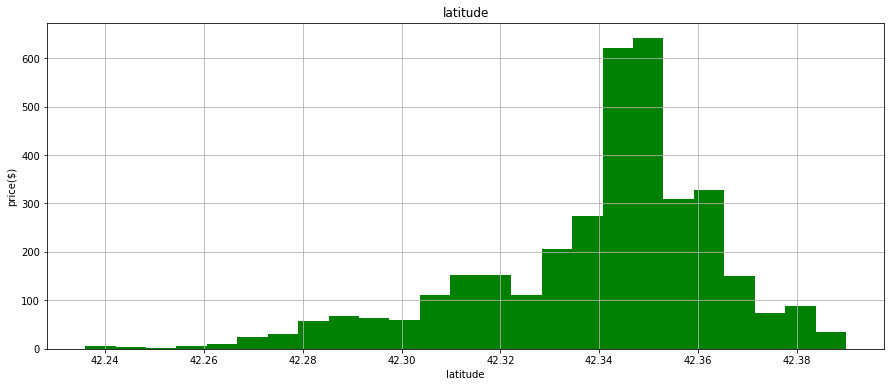

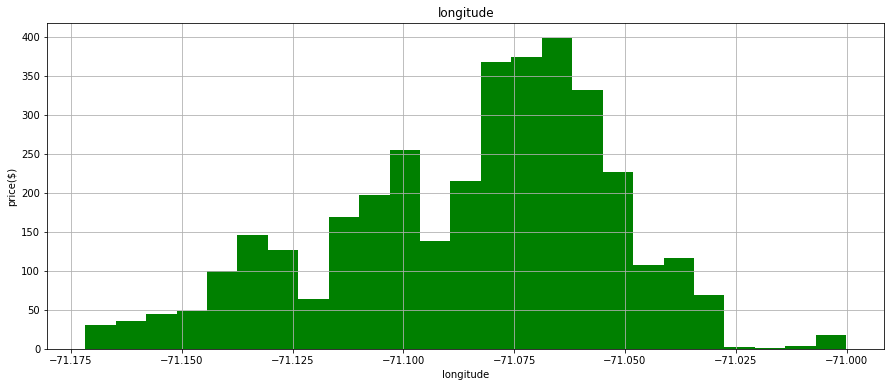

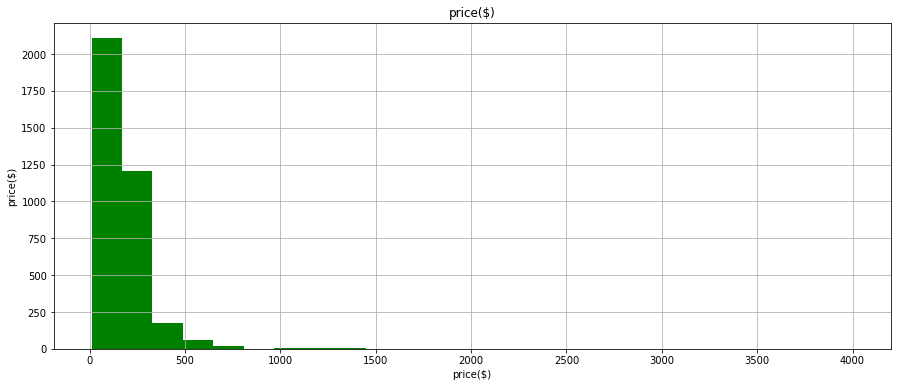

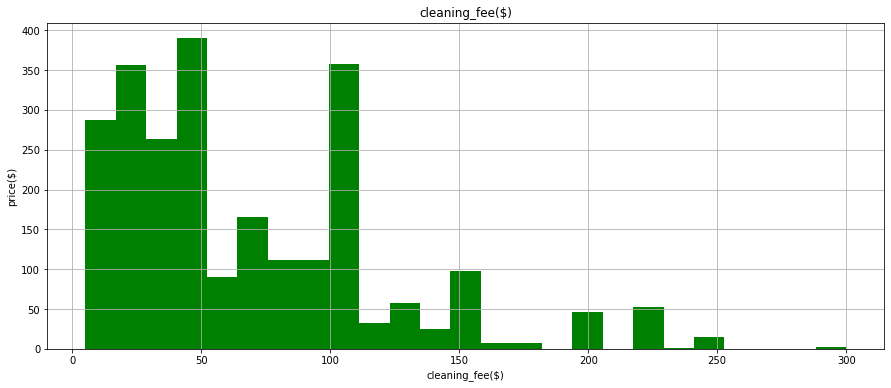

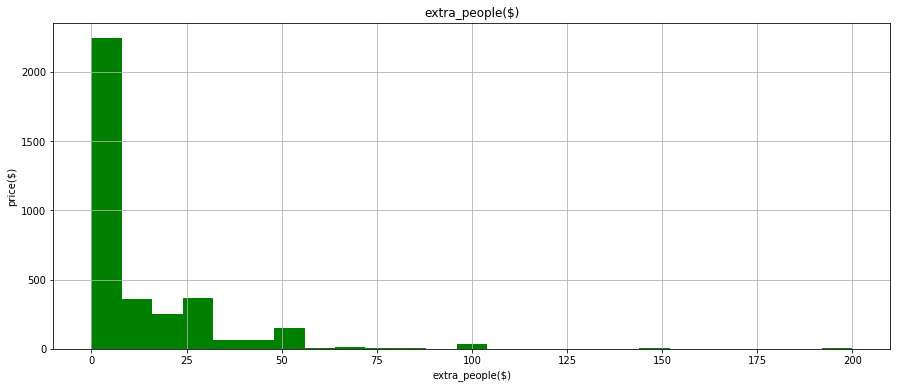

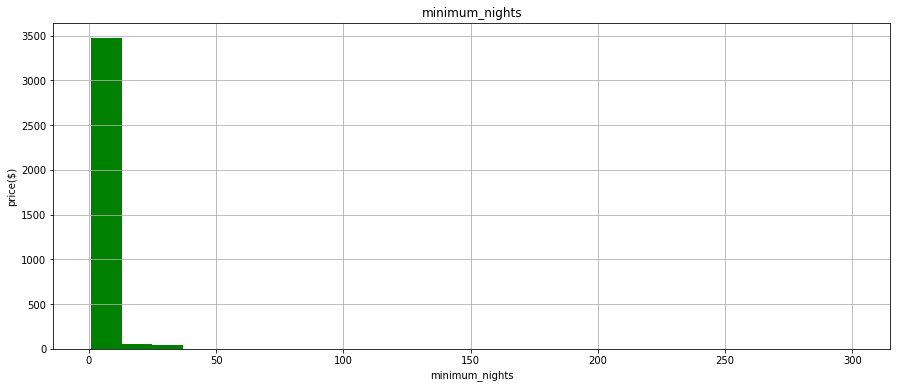

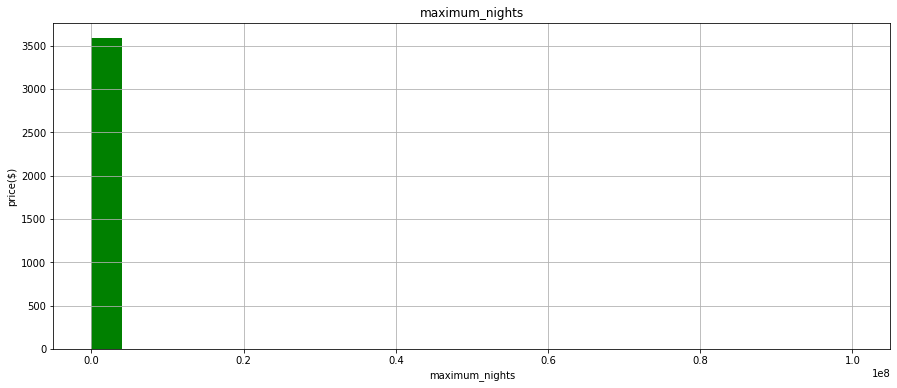

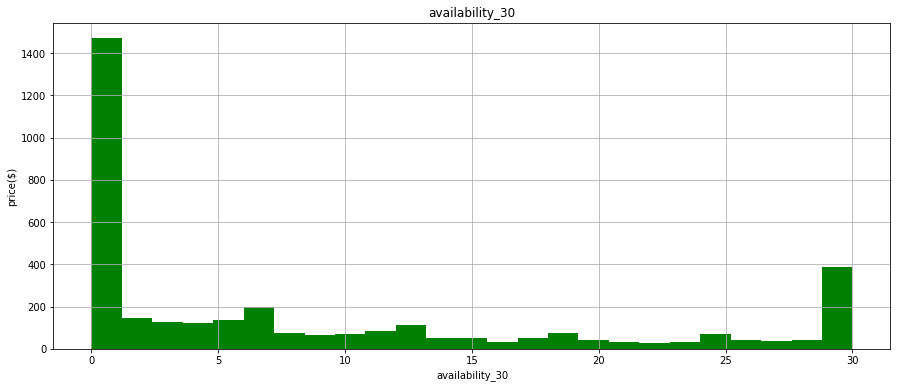

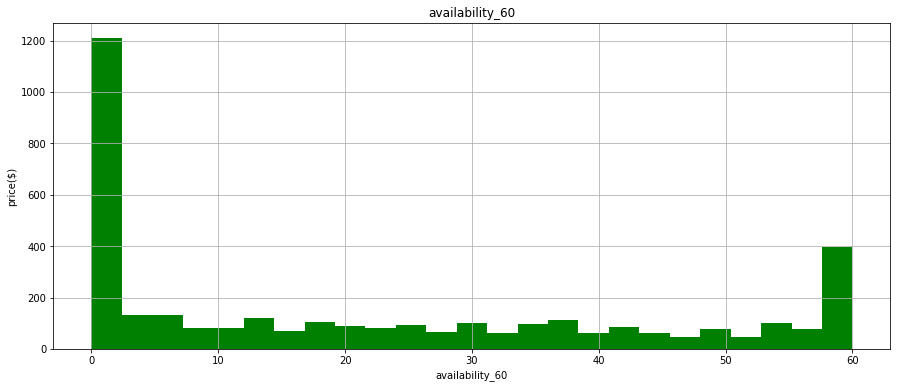

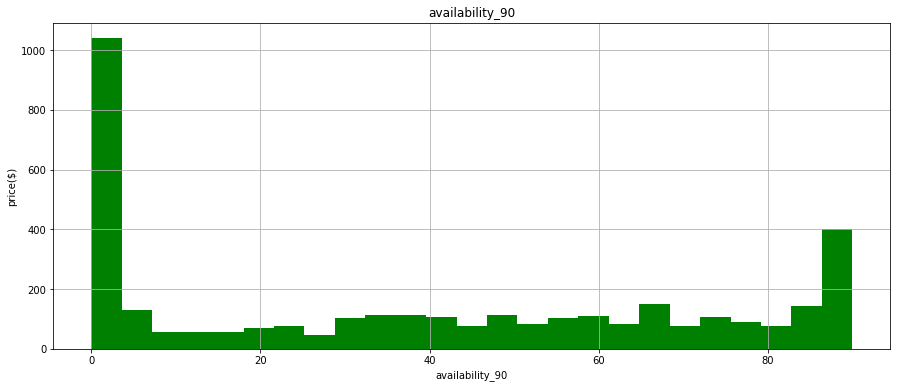

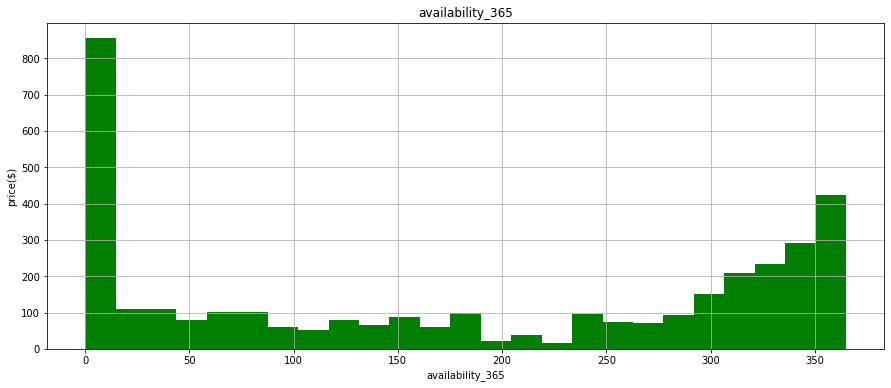

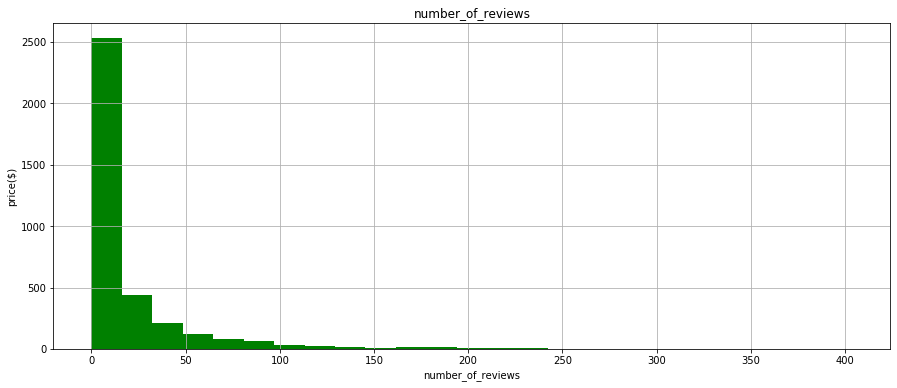

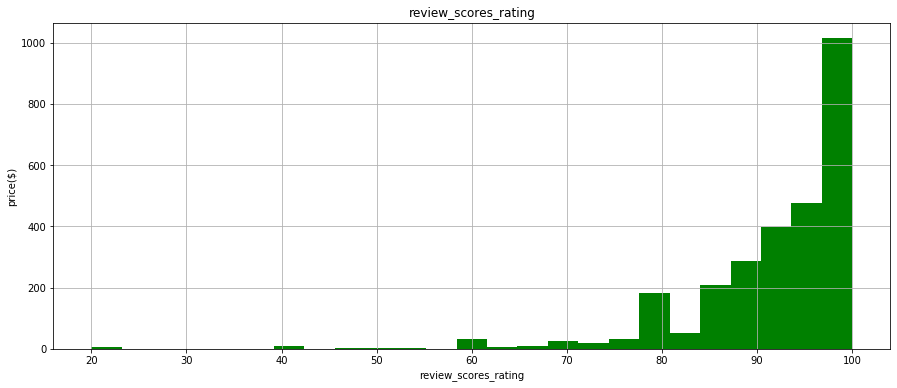

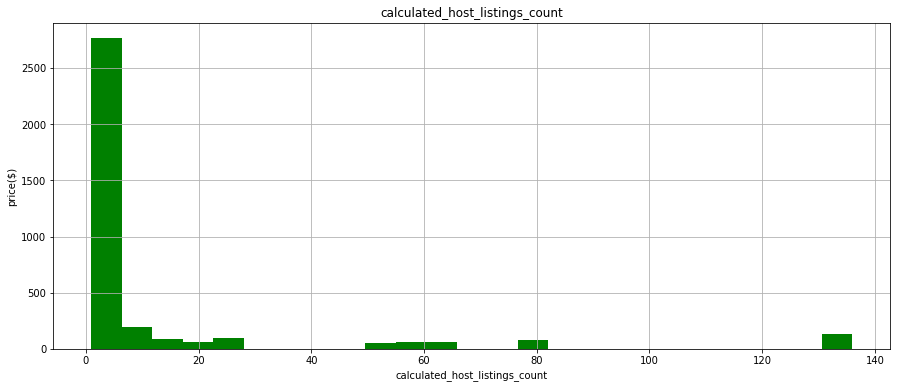

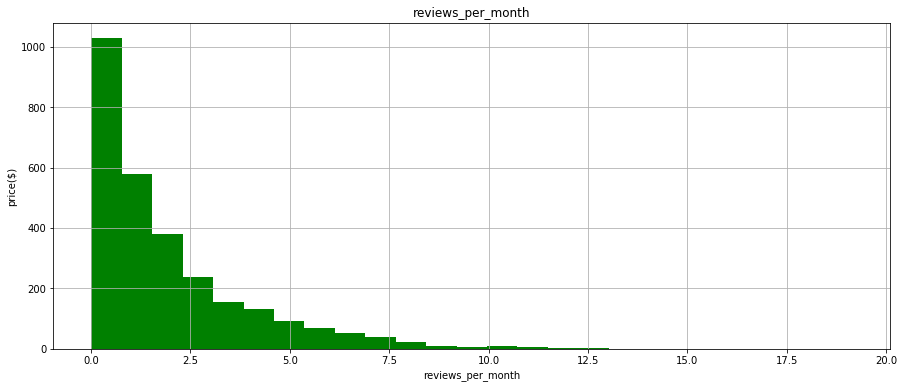

In [38]:
for feature in continuous_feature:
    listings_copy = listings.copy()
    listings_copy[feature].hist(bins=25, color="green")
    plt.xlabel(feature)
    plt.ylabel('price($)')
    plt.title(feature)
    plt.show()

### Outliers

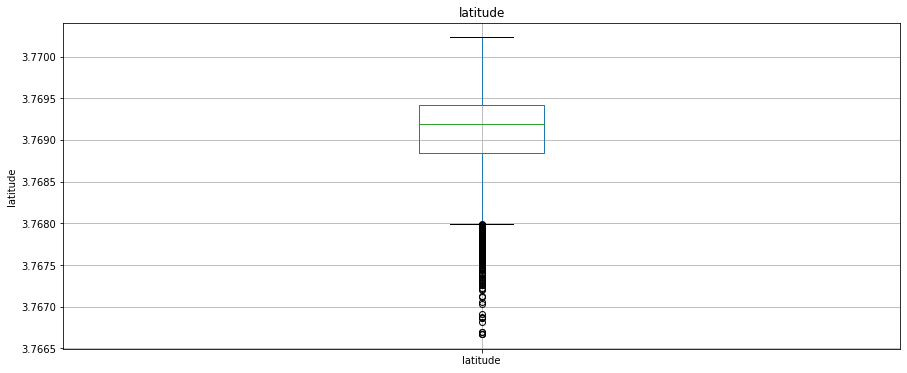

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


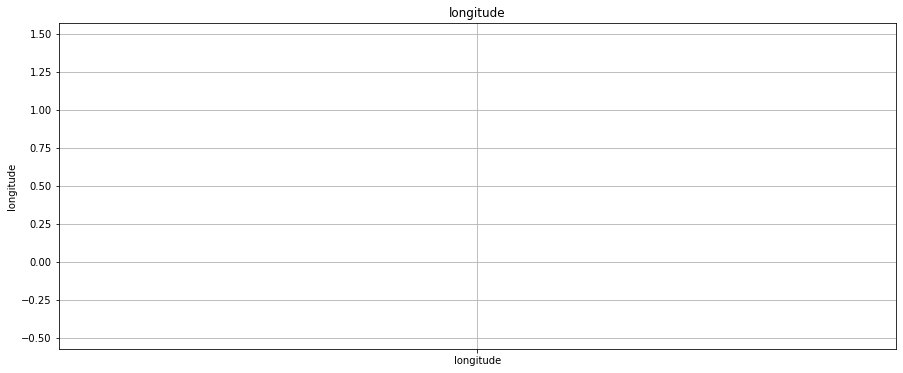

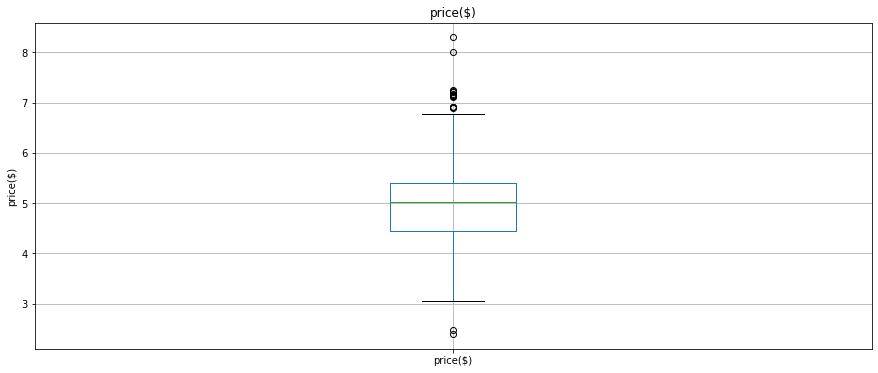

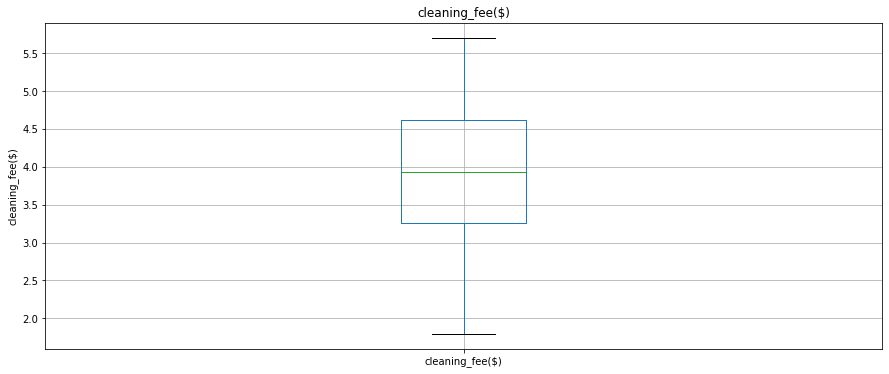

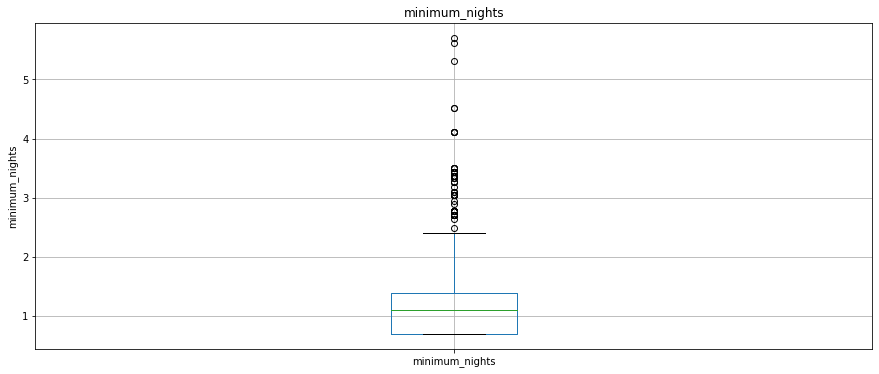

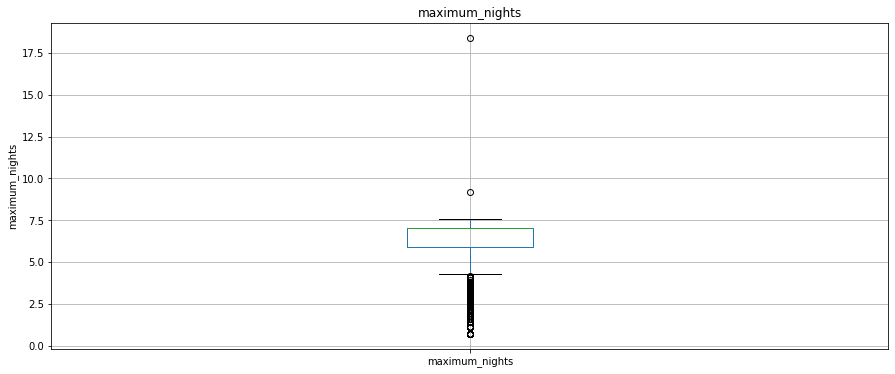

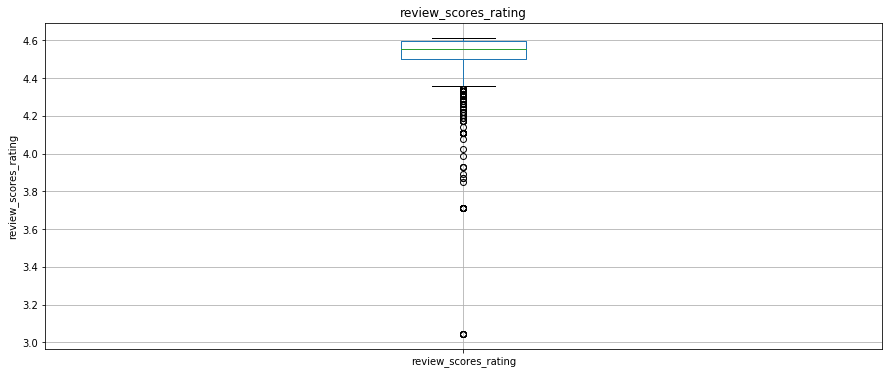

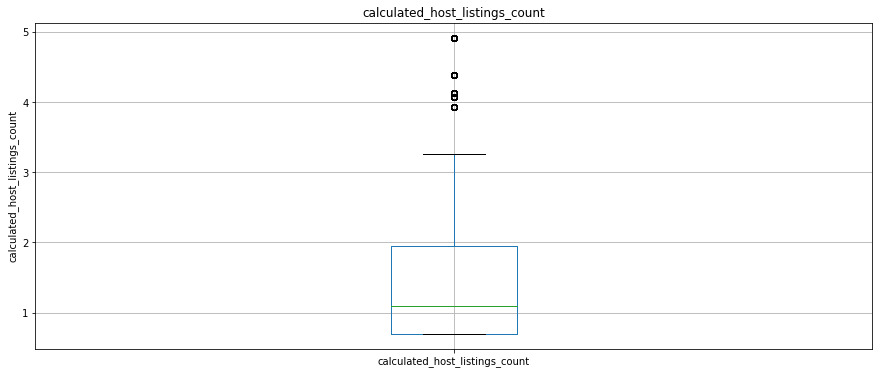

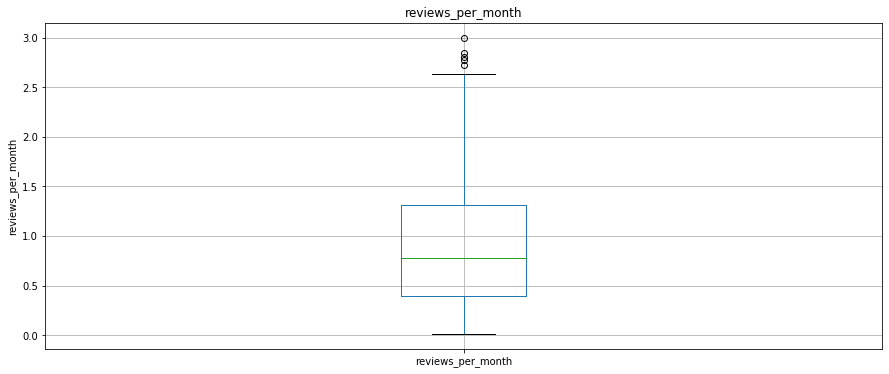

In [39]:
for feature in continuous_feature:
    listings_copy = listings.copy()
    
    if 0 in listings_copy[feature].unique():
        pass
    else:
        listings_copy[feature] = np.log(listings_copy[feature]+1)
        listings_copy.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical Variables

In [40]:
categorical_features = [feature for feature in listings.columns if listings_copy[feature].dtypes == 'O']
categorical_features

['host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'city',
 'zipcode',
 'smart_location',
 'is_location_exact',
 'property_type',
 'room_type',
 'bed_type',
 'calendar_updated',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification']

In [41]:
listings[categorical_features].head()

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,zipcode,smart_location,is_location_exact,property_type,room_type,bed_type,calendar_updated,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,NaN,f,t,f,Roslindale,Roslindale,Boston,02131,"Boston, MA",t,House,Entire home/apt,Real Bed,2 weeks ago,f,moderate,f,f
1,within an hour,f,t,t,Roslindale,Roslindale,Boston,02131,"Boston, MA",t,Apartment,Private room,Real Bed,a week ago,t,moderate,f,f
2,within a few hours,t,t,t,Roslindale,Roslindale,Boston,02131,"Boston, MA",t,Apartment,Private room,Real Bed,5 days ago,f,moderate,t,f
3,within a few hours,f,t,f,NaN,Roslindale,Boston,NaN,"Boston, MA",f,House,Private room,Real Bed,a week ago,f,moderate,f,f
4,within an hour,t,t,t,Roslindale,Roslindale,Boston,02131,"Boston, MA",t,House,Private room,Real Bed,2 weeks ago,f,flexible,f,f


In [42]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(listings[feature].unique())))

The feature is host_response_time and number of categories are 5
The feature is host_is_superhost and number of categories are 2
The feature is host_has_profile_pic and number of categories are 2
The feature is host_identity_verified and number of categories are 2
The feature is neighbourhood and number of categories are 31
The feature is neighbourhood_cleansed and number of categories are 25
The feature is city and number of categories are 39
The feature is zipcode and number of categories are 44
The feature is smart_location and number of categories are 39
The feature is is_location_exact and number of categories are 2
The feature is property_type and number of categories are 14
The feature is room_type and number of categories are 3
The feature is bed_type and number of categories are 5
The feature is calendar_updated and number of categories are 38
The feature is instant_bookable and number of categories are 2
The feature is cancellation_policy and number of categories are 4
The fe

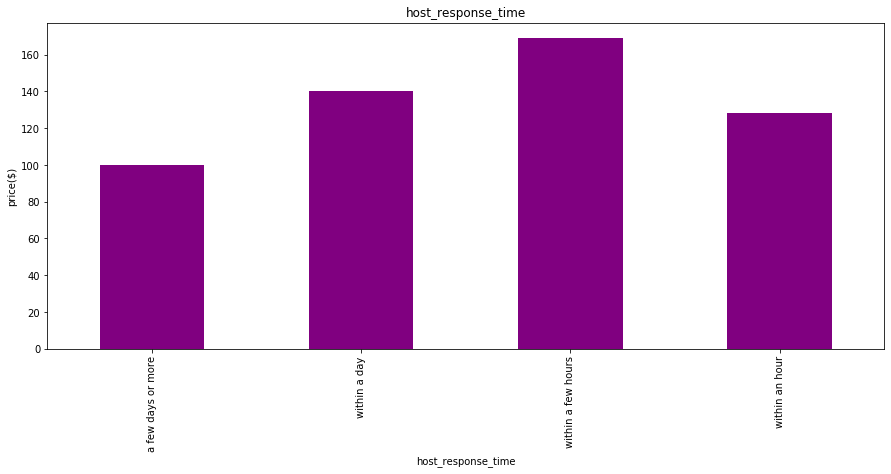

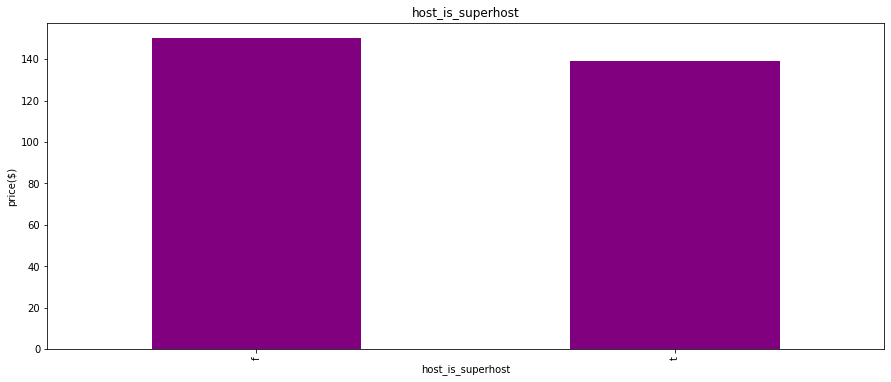

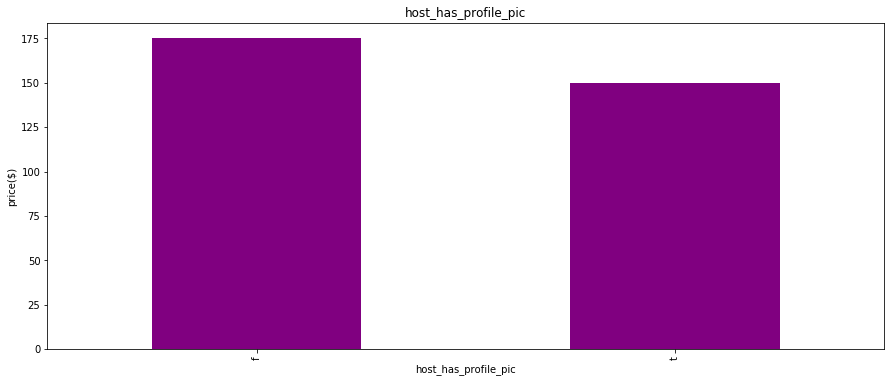

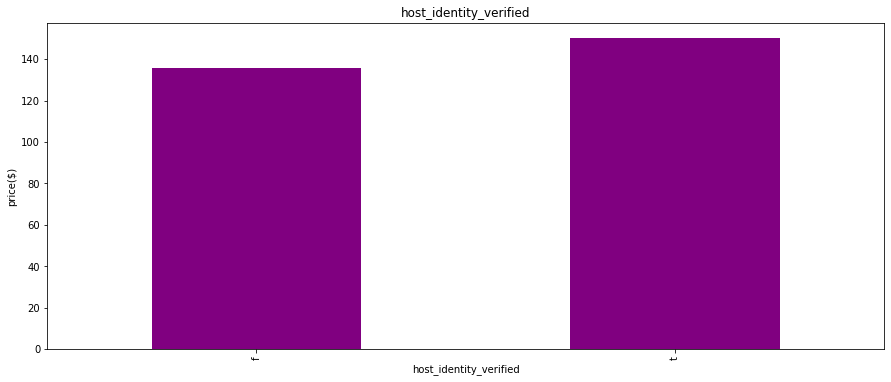

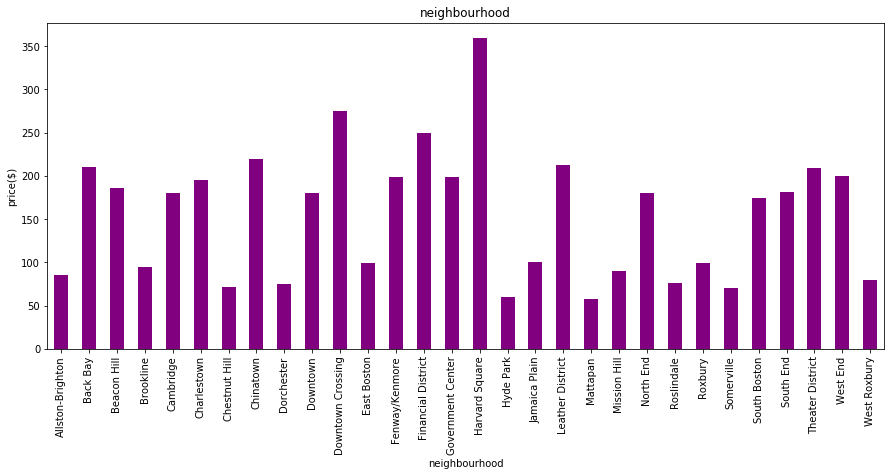

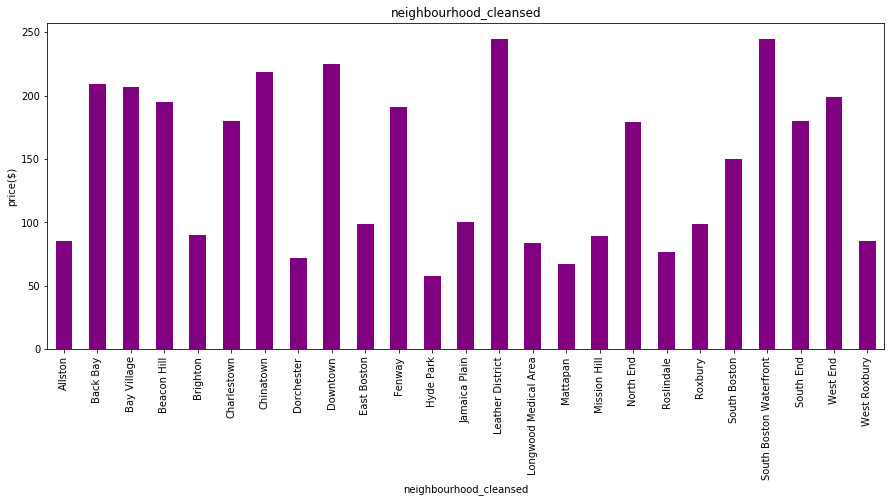

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 39039 missing from curre

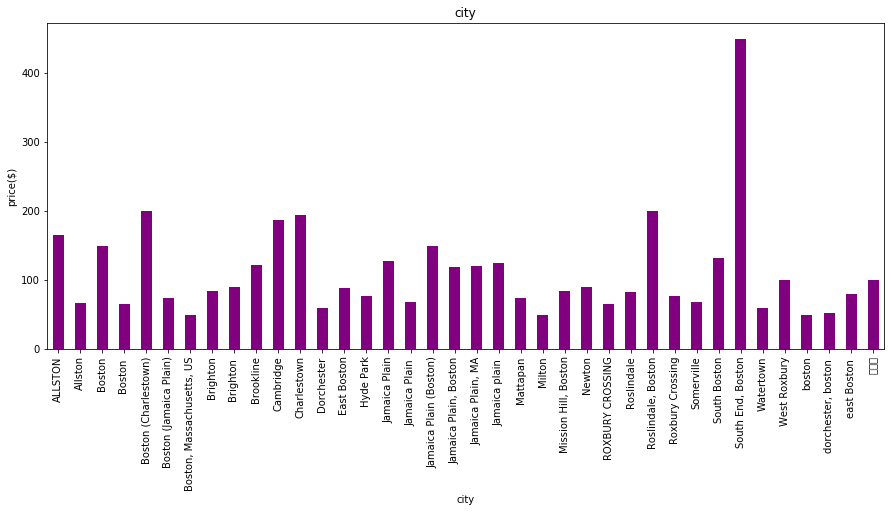

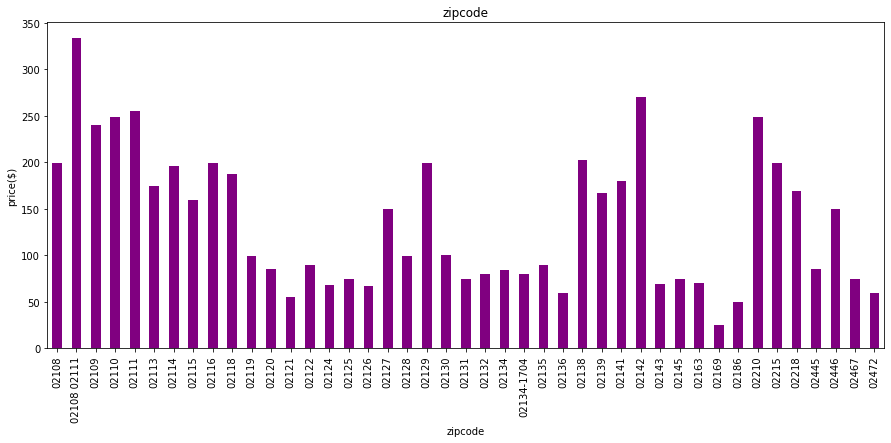

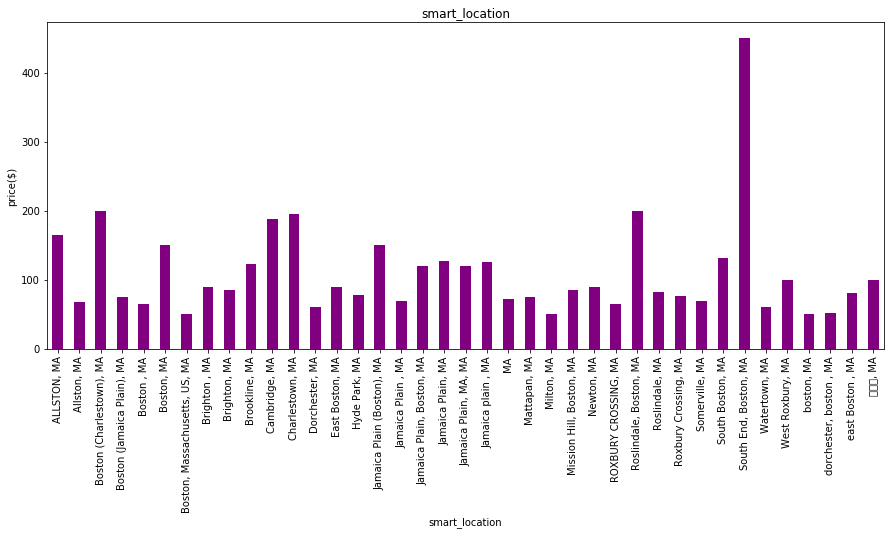

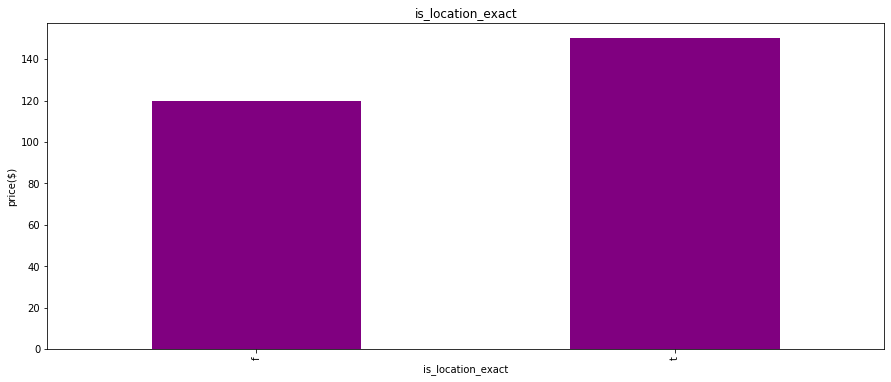

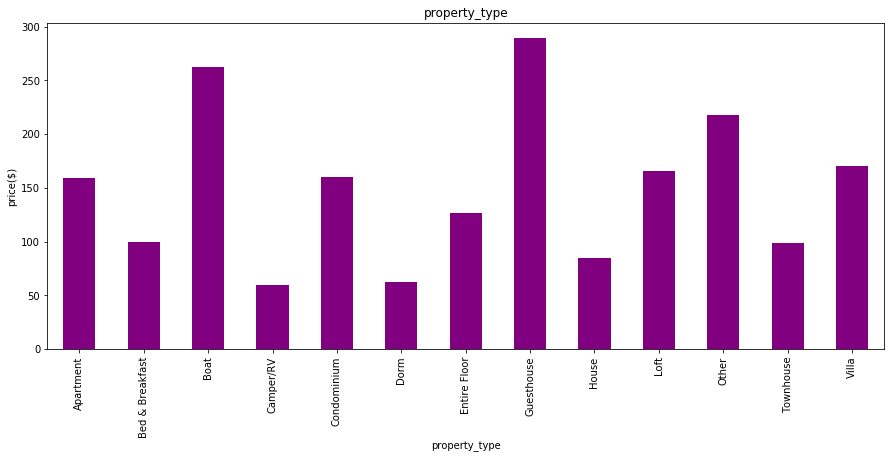

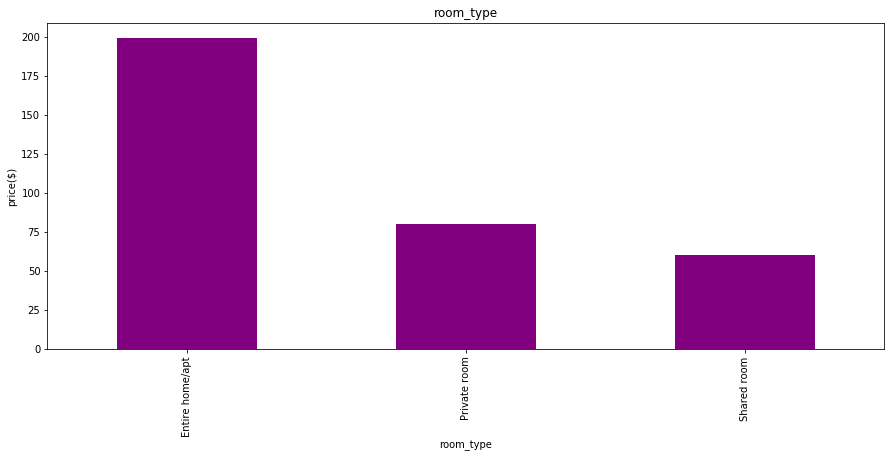

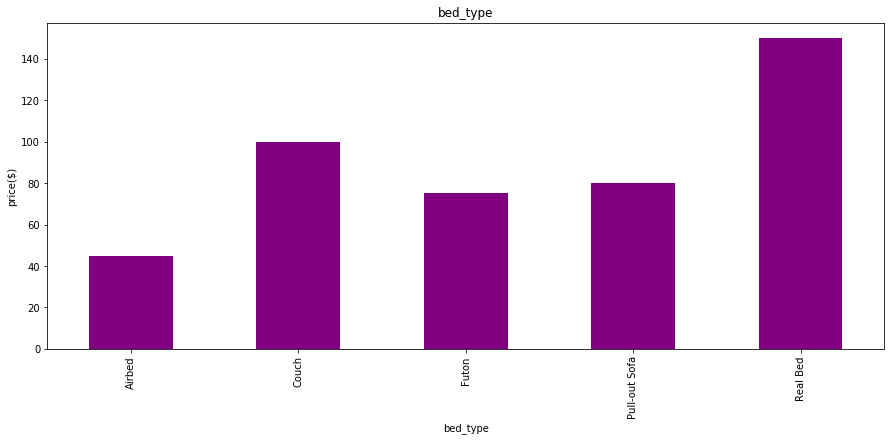

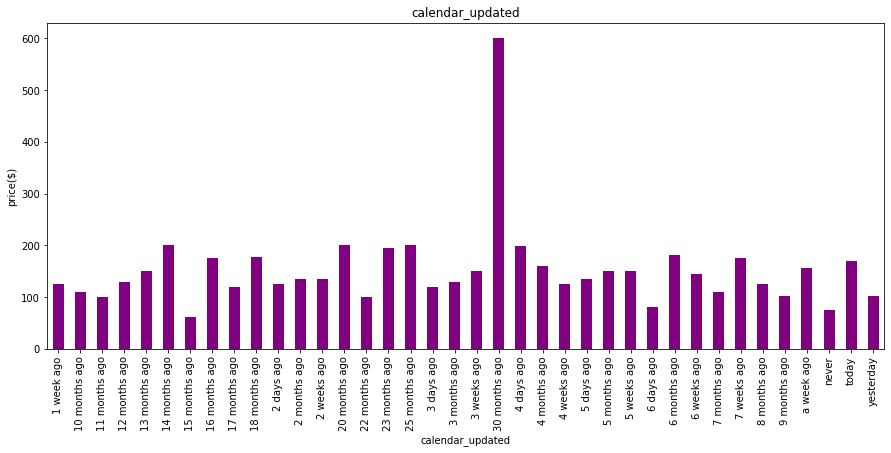

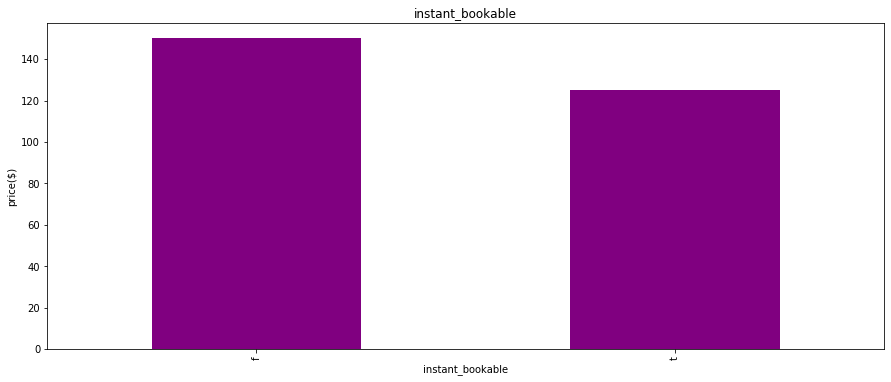

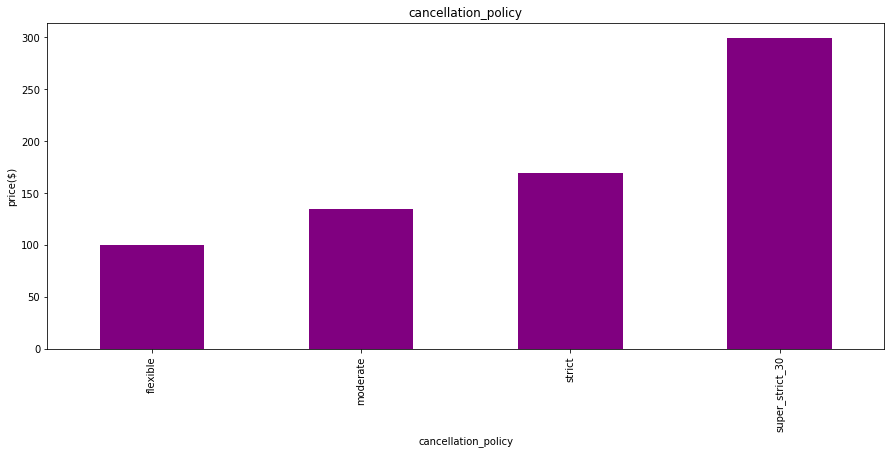

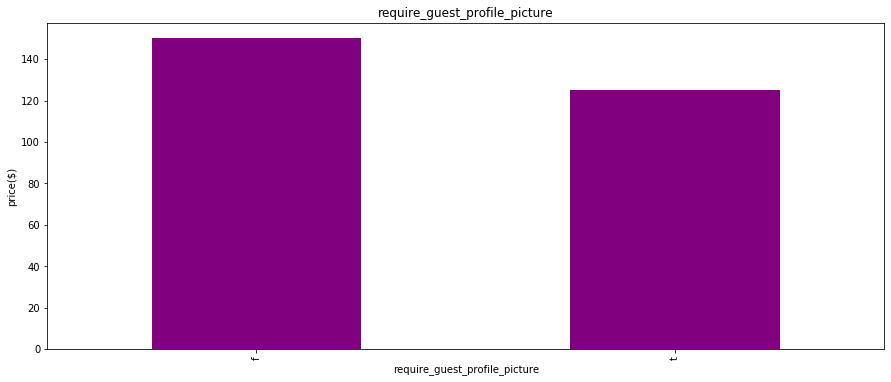

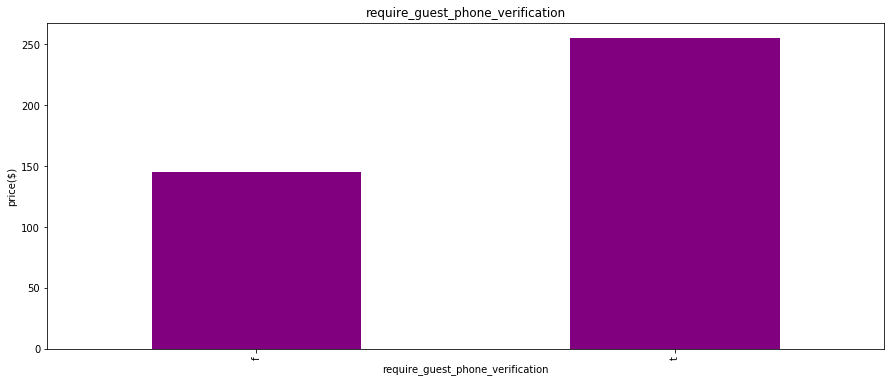

In [43]:
for feature in categorical_features:
    listings_copy = listings.copy()
    listings_copy.groupby(feature)['price($)'].median().plot.bar(color="purple")
    plt.xlabel(feature)
    plt.ylabel('price($)')
    plt.title(feature)
    plt.show()

### Creating Neighbourhood DataFrame

In [44]:
neigh_df = listings.loc[:,['neighbourhood','price($)']]
neigh_df.head()

,neighbourhood,price($)
0,Roslindale,250.0
1,Roslindale,65.0
2,Roslindale,65.0
3,NaN,75.0
4,Roslindale,79.0


In [45]:
neigh_df = pd.get_dummies(neigh_df,dummy_na=True, drop_first=True)
df1 = neigh_df.pop('price($)')
neigh_df['price($)'] = df1
neigh_df.head()

,neighbourhood_Back Bay,neighbourhood_Beacon Hill,neighbourhood_Brookline,neighbourhood_Cambridge,neighbourhood_Charlestown,neighbourhood_Chestnut Hill,neighbourhood_Chinatown,neighbourhood_Dorchester,neighbourhood_Downtown,neighbourhood_Downtown Crossing,...,neighbourhood_Roslindale,neighbourhood_Roxbury,neighbourhood_Somerville,neighbourhood_South Boston,neighbourhood_South End,neighbourhood_Theater District,neighbourhood_West End,neighbourhood_West Roxbury,neighbourhood_nan,price($)
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,250.0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,65.0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,65.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,75.0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,79.0


In [46]:
from sklearn.linear_model import LinearRegression

neigh_X = neigh_df.drop('price($)',axis=1)
neigh_y = neigh_df['price($)']

lr = LinearRegression()
model = lr.fit(neigh_X,neigh_y)

In [47]:
coef_table = pd.DataFrame(list(neigh_X.columns)).copy()

coef_table.rename(columns={0:'Neighbourhoods'}, inplace=True)
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())

coef_table = coef_table.sort_values(by="Coefs", ascending=True).reset_index(drop=True)

coef_table.head()

,Neighbourhoods,Coefs
0,neighbourhood_Chestnut Hill,-43.412088
1,neighbourhood_Mattapan,-42.162088
2,neighbourhood_Somerville,-21.085165
3,neighbourhood_Hyde Park,-20.482088
4,neighbourhood_Dorchester,-16.710806


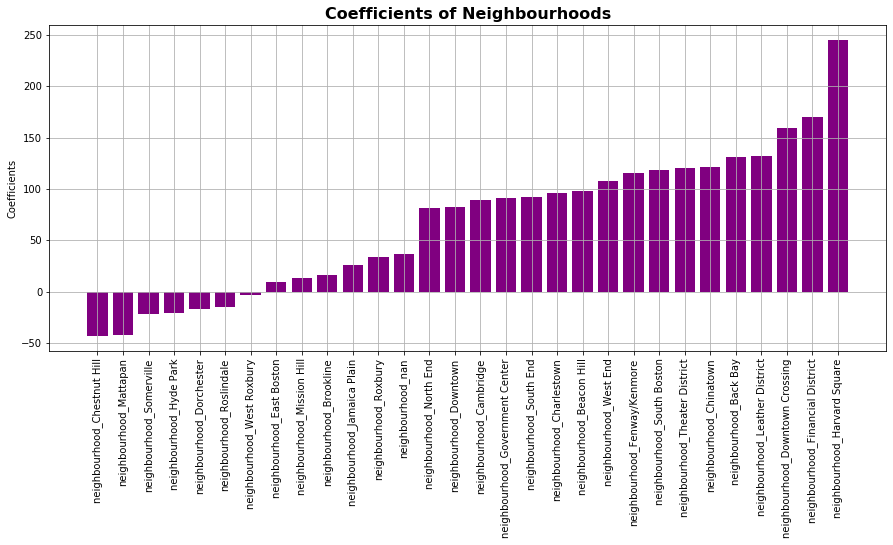

<Figure size 1080x432 with 0 Axes>

In [48]:
plt.rcParams['figure.figsize'] = (15,6)

fig, ax = plt.subplots()
fig = plt.figure(figsize=(15,6))

# ax = fig.add_subplot()
ax.set_facecolor(color= 'white')

ax.bar(coef_table['Neighbourhoods'],coef_table['Coefs'], color ='purple')

ax.set_xticklabels(coef_table['Neighbourhoods'],Rotation=90),
ax.set_ylabel('Coefficients')
ax.set_title('Coefficients of Neighbourhoods',fontsize=16,fontweight='bold')
ax.grid()
plt.show()

### Temporal Variables (Date Time Variables)

In [49]:
date_cols

['last_scraped',
 'host_since',
 'calendar_last_scraped',
 'first_review',
 'last_review']

In [50]:
listings['host_life (days)'] = listings['last_scraped'] - listings['host_since']
listings['host_life (days)'] = listings['host_life (days)'].dt.days

listings['since_first_review (days)'] = listings['last_scraped'] - listings['first_review']
listings['since_first_review (days)'] = listings['since_first_review (days)'].dt.days

listings['since_last_review (days)'] = listings['last_scraped'] - listings['last_review']
listings['since_last_review (days)'] = listings['since_last_review (days)'].dt.days

In [51]:
listings.drop(date_cols, axis=1, inplace = True)

In [52]:
listings.head()

,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,...,Wheelchair Accessible,Pets live on this property,Air Conditioning,Gym,Doorman,Essentials,Paid Parking Off Premises,host_life (days),since_first_review (days),since_last_review (days)
0,NaN,NaN,NaN,f,1,t,f,Roslindale,Roslindale,Boston,...,0,1,0,0,0,1,0,511,NaN,NaN
1,within an hour,1.0,1.00,f,1,t,t,Roslindale,Roslindale,Boston,...,0,1,1,0,0,1,0,1553,829.0,25.0
2,within a few hours,1.0,0.88,t,1,t,t,Roslindale,Roslindale,Boston,...,0,0,1,0,0,1,0,2676,2607.0,33.0
3,within a few hours,1.0,0.50,f,1,t,f,NaN,Roslindale,Boston,...,0,0,1,1,0,1,0,1235,10.0,10.0
4,within an hour,1.0,1.00,t,1,t,t,Roslindale,Roslindale,Boston,...,0,0,1,0,0,1,0,850,386.0,6.0


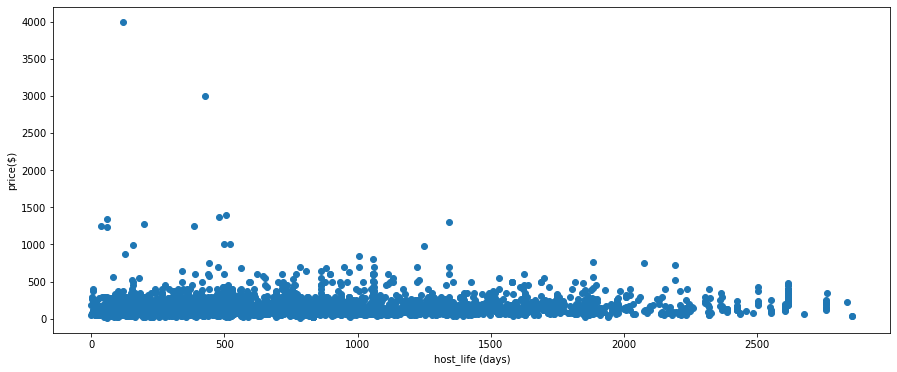

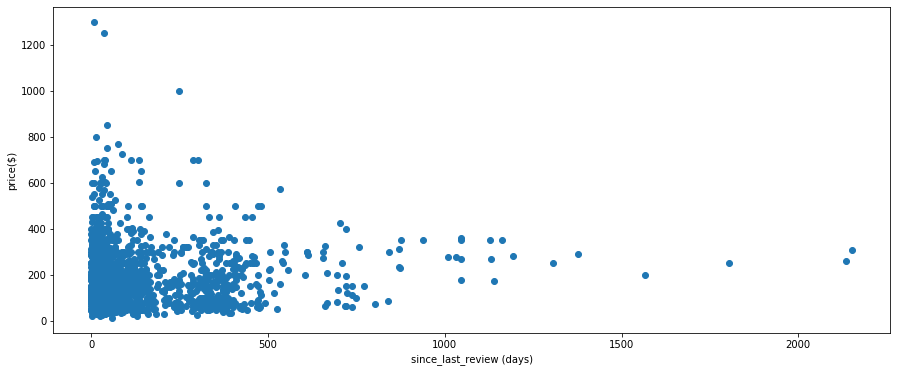

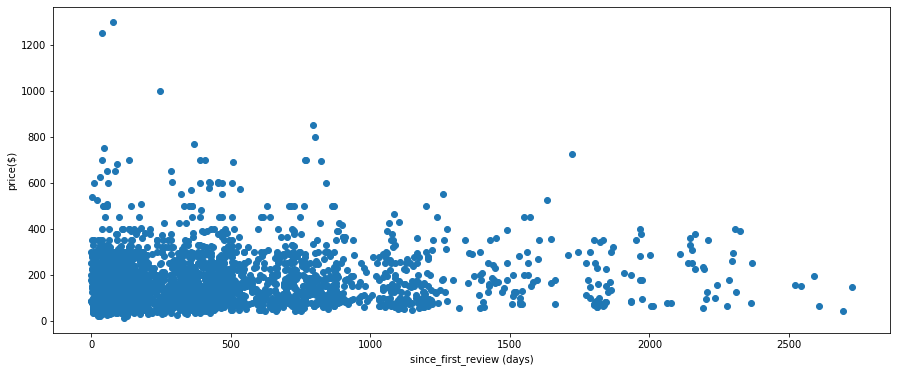

In [53]:
days = ['host_life (days)','since_last_review (days)','since_first_review (days)']

for feature in days:
    plt.scatter(listings[feature], listings['price($)'])
    plt.xlabel(feature)
    plt.ylabel('price($)')
    plt.show()

# Train and Test Split

In [54]:
print("This dataset has {} rows and {} columns".format(listings.shape[0],listings.shape[1]),end="\n")
listings.head()

This dataset has 3585 rows and 93 columns


,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,...,Wheelchair Accessible,Pets live on this property,Air Conditioning,Gym,Doorman,Essentials,Paid Parking Off Premises,host_life (days),since_first_review (days),since_last_review (days)
0,NaN,NaN,NaN,f,1,t,f,Roslindale,Roslindale,Boston,...,0,1,0,0,0,1,0,511,NaN,NaN
1,within an hour,1.0,1.00,f,1,t,t,Roslindale,Roslindale,Boston,...,0,1,1,0,0,1,0,1553,829.0,25.0
2,within a few hours,1.0,0.88,t,1,t,t,Roslindale,Roslindale,Boston,...,0,0,1,0,0,1,0,2676,2607.0,33.0
3,within a few hours,1.0,0.50,f,1,t,f,NaN,Roslindale,Boston,...,0,0,1,1,0,1,0,1235,10.0,10.0
4,within an hour,1.0,1.00,t,1,t,t,Roslindale,Roslindale,Boston,...,0,0,1,0,0,1,0,850,386.0,6.0


In [55]:
# Splitting into train and test datasets

listings_X = listings.drop('price($)',axis=1)

listings_y = listings['price($)']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(listings_X, listings_y, test_size =0.2, random_state = 10)

In [56]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((2868, 92), (717, 92), (2868,), (717,))

# Feature Engineering

In [57]:
X_train.head()

,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,...,Wheelchair Accessible,Pets live on this property,Air Conditioning,Gym,Doorman,Essentials,Paid Parking Off Premises,host_life (days),since_first_review (days),since_last_review (days)
2076,within an hour,1.00,0.99,f,4,t,t,Downtown Crossing,Downtown,Boston,...,0,0,1,0,0,1,0,362,60.0,8.0
2364,within a few hours,0.98,0.55,f,749,t,t,Fenway/Kenmore,Fenway,Boston,...,0,0,1,1,0,1,0,527,120.0,120.0
3208,NaN,NaN,NaN,f,1,t,t,South Boston,South Boston,Boston,...,0,0,1,0,0,1,0,1186,NaN,NaN
2181,within a few hours,1.00,0.91,f,52,t,t,Beacon Hill,Downtown,Boston,...,0,0,1,0,0,0,0,699,95.0,53.0
1557,NaN,NaN,NaN,f,1,t,t,NaN,East Boston,Boston,...,0,0,1,0,0,1,0,850,NaN,NaN


In [58]:
X_test.head()

,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,...,Wheelchair Accessible,Pets live on this property,Air Conditioning,Gym,Doorman,Essentials,Paid Parking Off Premises,host_life (days),since_first_review (days),since_last_review (days)
236,within an hour,1.0,1.0,f,3,t,t,Jamaica Plain,Jamaica Plain,Boston,...,0,1,1,0,0,1,0,76,NaN,NaN
2855,within an hour,0.9,1.0,f,1,f,f,Dorchester,Dorchester,Boston,...,0,1,1,0,0,1,0,79,45.0,16.0
3460,within an hour,1.0,1.0,f,1,t,f,Allston-Brighton,Allston,Boston,...,0,0,1,0,0,0,0,472,60.0,54.0
784,within a few hours,1.0,1.0,f,3,t,t,Roxbury,Roxbury,Boston,...,0,0,1,0,0,1,0,989,221.0,221.0
454,NaN,NaN,NaN,f,1,t,f,Mission Hill,Mission Hill,Boston,...,0,0,0,0,0,1,0,325,309.0,248.0


To prevent data leakage, I separated the test and train data before doing the feature engineering. Feature engineering will still be performed on both datasets at the same time.

## <u>Missing Values</u>

### Numerical Features

In [59]:
# Creating a list of numerical features that have NULL values

numerical_with_nan = [feature for feature in X_train.columns if X_train[feature].isna().sum() > 1 and X_train[feature].dtypes != 'O']

# Printing the percentage of NULL values from numerical features with NULL values

for feature in numerical_with_nan:
    print("{}: {}% missing values".format(feature, np.round(X_train[feature].isna().mean(),4)))

print("\n")

for feature in numerical_with_nan:
    print("{}: {}% missing values".format(feature, np.round(X_test[feature].isna().mean(),4)))

host_response_rate(%): 0.1339% missing values
host_acceptance_rate(%): 0.1339% missing values
bathrooms: 0.0035% missing values
bedrooms: 0.0028% missing values
beds: 0.0017% missing values
cleaning_fee($): 0.3117% missing values
review_scores_rating: 0.2305% missing values
review_scores_accuracy: 0.2333% missing values
review_scores_cleanliness: 0.2319% missing values
review_scores_checkin: 0.2322% missing values
review_scores_communication: 0.2322% missing values
review_scores_location: 0.2322% missing values
review_scores_value: 0.2326% missing values
reviews_per_month: 0.2141% missing values
since_first_review (days): 0.2141% missing values
since_last_review (days): 0.2141% missing values


host_response_rate(%): 0.1213% missing values
host_acceptance_rate(%): 0.1213% missing values
bathrooms: 0.0056% missing values
bedrooms: 0.0028% missing values
beds: 0.0056% missing values
cleaning_fee($): 0.2971% missing values
review_scores_rating: 0.212% missing values
review_scores_accuracy

In [60]:
X_train[numerical_with_nan].head()

,host_response_rate(%),host_acceptance_rate(%),bathrooms,bedrooms,beds,cleaning_fee($),review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,since_first_review (days),since_last_review (days)
2076,1.00,0.99,1.0,2.0,3.0,100.0,90.0,9.0,9.0,9.0,9.0,10.0,9.0,4.92,60.0,8.0
2364,0.98,0.55,2.0,2.0,2.0,100.0,40.0,4.0,6.0,8.0,4.0,8.0,2.0,0.25,120.0,120.0
3208,NaN,NaN,1.0,1.0,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2181,1.00,0.91,1.0,0.0,1.0,225.0,100.0,10.0,9.0,10.0,10.0,9.0,9.0,0.63,95.0,53.0
1557,NaN,NaN,1.0,1.0,1.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
for feature in numerical_with_nan:
    
    median_value = X_train[feature].median()
    median_value_train = X_train[feature].median()
    X_train[feature+'_nan'] = np.where(X_train[feature].isna(),1,0)
    
    # Replacing NULL values with median value of the feature
    X_train[feature].fillna(median_value, inplace=True)
    
    
for feature in numerical_with_nan:
    
    median_value = X_test[feature].median()
    median_value_test = X_test[feature].median()
    X_test[feature+'_nan'] = np.where(X_test[feature].isna(),1,0)
    
    # Replacing NULL values with median value of the feature
    X_test[feature].fillna(median_value, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [62]:
X_train[numerical_with_nan].isna().sum()

host_response_rate(%)          0
host_acceptance_rate(%)        0
bathrooms                      0
bedrooms                       0
beds                           0
cleaning_fee($)                0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
since_first_review (days)      0
since_last_review (days)       0
dtype: int64

In [63]:
X_test[numerical_with_nan].isna().sum()

host_response_rate(%)          0
host_acceptance_rate(%)        0
bathrooms                      0
bedrooms                       0
beds                           0
cleaning_fee($)                0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
since_first_review (days)      0
since_last_review (days)       0
dtype: int64

### Categorical Features

In [64]:
# Creating a list of categorical features that have NULL values

features_nan = [feature for feature in X_train.columns if X_train[feature].isna().sum() > 1 and X_train[feature].dtypes == 'O']

# Printing the percentage of NULL values from categorical features with NULL values

for feature in features_nan:
    print("(X_train) {}: {}% missing values".format(feature, np.round(X_train[feature].isna().mean(),4)))
    print("(X_test) {}: {}% missing values".format(feature, np.round(X_test[feature].isna().mean(),4)))

(X_train) host_response_time: 0.1339% missing values
(X_test) host_response_time: 0.1213% missing values
(X_train) neighbourhood: 0.1524% missing values
(X_test) neighbourhood: 0.1478% missing values
(X_train) zipcode: 0.0108% missing values
(X_test) zipcode: 0.0098% missing values
(X_train) property_type: 0.001% missing values
(X_test) property_type: 0.0% missing values


In [65]:
def replace_cat_feature(df,features_nan):
    """
    This function replaces categorical NULL values
    Input: A dataframe and a list of categorical features with NULL values.
    Output: A dataframe with NULL values replaced with the string 'Missing'
    
    """
    
    df = df.copy()
    df[features_nan] = df[features_nan].fillna('Missing')
    return df


X_train = replace_cat_feature(X_train,features_nan)
X_test = replace_cat_feature(X_test,features_nan)

In [66]:
X_train[features_nan].isna().sum()

host_response_time    0
neighbourhood         0
zipcode               0
property_type         0
dtype: int64

In [67]:
X_test[features_nan].isna().sum()

host_response_time    0
neighbourhood         0
zipcode               0
property_type         0
dtype: int64

### Transforming Categorical Features

1. For NULL values in neighbourhood, i will replace them with the value in neighbourhood cleansed. Then take the top frequency of both
2. host_neighbourhood - top frequency
3. host_verifications - parse data

2. calendar_updated will be converted to integers with day = 1
3. property_type - i will take the first 6 values and combine the rest to be other
4. For smart location - Boston and then the rest of them
5. For zipcode i will use frequency

In [68]:
print('X_train')
print('\n')

for feature in X_train.select_dtypes(include='object').columns:
    print(feature+" has {} distinct values".format(len(X_train.select_dtypes(include='object')[feature].unique())))

X_train


host_response_time has 5 distinct values
host_is_superhost has 2 distinct values
host_has_profile_pic has 2 distinct values
host_identity_verified has 2 distinct values
neighbourhood has 31 distinct values
neighbourhood_cleansed has 25 distinct values
city has 36 distinct values
zipcode has 43 distinct values
smart_location has 36 distinct values
is_location_exact has 2 distinct values
property_type has 14 distinct values
room_type has 3 distinct values
bed_type has 5 distinct values
calendar_updated has 38 distinct values
instant_bookable has 2 distinct values
cancellation_policy has 4 distinct values
require_guest_profile_picture has 2 distinct values
require_guest_phone_verification has 2 distinct values


In [69]:
print('X_test')
print('\n')

for feature in X_test.select_dtypes(include='object').columns:
    print(feature+" has {} distinct values".format(len(X_test.select_dtypes(include='object')[feature].unique())))

X_test


host_response_time has 5 distinct values
host_is_superhost has 2 distinct values
host_has_profile_pic has 2 distinct values
host_identity_verified has 2 distinct values
neighbourhood has 28 distinct values
neighbourhood_cleansed has 23 distinct values
city has 17 distinct values
zipcode has 34 distinct values
smart_location has 17 distinct values
is_location_exact has 2 distinct values
property_type has 9 distinct values
room_type has 3 distinct values
bed_type has 5 distinct values
calendar_updated has 31 distinct values
instant_bookable has 2 distinct values
cancellation_policy has 4 distinct values
require_guest_profile_picture has 2 distinct values
require_guest_phone_verification has 2 distinct values


### One Hot Encoding

We will use one hot encoding to transform multiple features

In [70]:
def one_hot_top_x(df, feature, top_labels):
    
    """
    
    This function creates dummy variables given a dataframe, feature,
    and list with the labels intended
    
    """
    for label in top_labels:
        df[feature+'_'+label] = np.where(df[feature] == label, 1, 0) 

In [71]:
##### Neighbourhood

# A list of the top 10 neighbourhood based on frequency 
top_10_neigh = [x for x in X_train.neighbourhood.value_counts().sort_values(ascending=False).head(10).index] # X_train
top_10_neigh_test = [x for x in X_test.neighbourhood.value_counts().sort_values(ascending=False).head(10).index] # X_test

one_hot_top_x(X_train,'neighbourhood',top_10_neigh)
one_hot_top_x(X_test,'neighbourhood',top_10_neigh) #...using X_train list to keep consistency


##### Neighbourhood Cleansed

# A list of the top 10 neighbourhood_cleansed based on frequency
top_10_neigh_cl = [x for x in X_train.neighbourhood_cleansed.value_counts().sort_values(ascending=False).head(10).index] # X_train
top_10_neigh_cl_test = [x for x in X_test.neighbourhood_cleansed.value_counts().sort_values(ascending=False).head(10).index] # X_test

one_hot_top_x(X_train,'neighbourhood_cleansed',top_10_neigh_cl)
one_hot_top_x(X_test,'neighbourhood_cleansed',top_10_neigh_cl) #...using X_train list to keep consistency


##### City

one_hot_top_x(X_train,'city',['Boston']) # X_train
one_hot_top_x(X_test,'city',['Boston']) # X_test


##### Zipcode

# Creating the Lists to Input into the One Hot Encoding Function
top_10_zip = [x for x in X_train.zipcode.value_counts().sort_values(ascending=False).head(10).index] # X_train
top_10_zip_test = [x for x in X_test.zipcode.value_counts().sort_values(ascending=False).head(10).index] # X_test

# Top 10 zip codes will each be separated to different columns
one_hot_top_x(X_train,'zipcode',top_10_zip) # X_train
one_hot_top_x(X_test,'zipcode',top_10_zip) # X_test...using X_train list to keep consistency


##### Smart Location

one_hot_top_x(X_train,'smart_location',['Boston, MA']) # X_train
one_hot_top_x(X_test,'smart_location',['Boston, MA']) # X_test


##### Property Type

top_6_property = [x for x in X_train.property_type.value_counts().sort_values(ascending=False).head(6).index]
top_6_property_test = [x for x in X_test.property_type.value_counts().sort_values(ascending=False).head(6).index]

# Top 6 property types will each be expanded to separate columns
one_hot_top_x(X_train,'property_type',top_6_property)
one_hot_top_x(X_test,'property_type',top_6_property_test)


In [72]:
# Create dummy variables for boolean features

bool_cols = ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']

for feature in bool_cols:
    X_train[feature] = X_train[feature].replace({'t':1,'f':0})
    X_test[feature] = X_test[feature].replace({'t':1,'f':0})

In [73]:
# Creating a map for 'calendar_updated' feature

response_time_map = {'within an hour':1,
                    'within a few hours':2,
                    'within a day':3,
                    'a few days or more':4
}

In [74]:
# Creating a map for 'host_response_time' feature

calendar_map = {'2 weeks ago': 14,
                 'a week ago': 7,
                 '5 days ago': 5,
                 '3 days ago': 3,
                  'yesterday': 1,
                      'today': 1,
                '6 weeks ago': 42,
               '3 months ago': 90,
                 '2 days ago': 2,
               '2 months ago': 60,
               '5 months ago': 150,
                '3 weeks ago': 21,
              '10 months ago': 300,
                '4 weeks ago': 28,
                 '1 week ago': 7,
                 '6 days ago': 6,
                 '4 days ago': 4,
              '12 months ago': 360,
               '6 months ago': 180,
               '8 months ago': 240,
               '4 months ago': 120,
                '5 weeks ago': 35,
              '15 months ago': 450,
                '7 weeks ago': 49,
               '7 months ago': 210,
               '9 months ago': 270,
              '16 months ago': 480,
              '11 months ago': 330,
              '14 months ago': 420,
              '13 months ago': 390,
              '22 months ago': 660,
                      'never': 0,
              '17 months ago': 510,
              '25 months ago': 750,
              '30 months ago': 900,
              '18 months ago': 540,
              '23 months ago': 690,
              '20 months ago': 600
}

In [75]:
# Converting the time intervals to an integer
X_train['host_response_time'] = X_train.host_response_time.map(response_time_map)
X_test['host_response_time'] = X_test.host_response_time.map(response_time_map)

# Because host_response_time will now be a float type column, we will replace the NaN values 
X_train['host_response_time'].fillna(median_value, inplace=True)
X_test['host_response_time'].fillna(median_value, inplace=True)

# Converting the 'calendar_updated' feature
X_train['calendar_updated'] = X_train.calendar_updated.map(calendar_map)
X_test['calendar_updated'] = X_test.calendar_updated.map(calendar_map)

In [76]:
# Creating dummy variables for categories with 2-4 levels
dummy_cols = ['room_type', 'bed_type', 'cancellation_policy']

X_train = pd.get_dummies(X_train, columns=dummy_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=dummy_cols, drop_first=True)

In [77]:
# Dropping redundant columns
cat_cols_todrop = ['neighbourhood','neighbourhood_cleansed','city','zipcode','smart_location','property_type','latitude','longitude']

X_train.drop(cat_cols_todrop, axis=1, inplace=True)
X_test.drop(cat_cols_todrop, axis=1, inplace=True)

# Feature Selection

In [78]:
X_train.head()

,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,...,property_type_Loft,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
2076,1.0,1.00,0.99,0,4,1,1,1,6,1.0,...,0,0,0,0,0,0,1,1,0,0
2364,2.0,0.98,0.55,0,749,1,1,1,5,2.0,...,0,0,0,0,0,0,1,0,1,0
3208,24.0,1.00,0.94,0,1,1,1,1,2,1.0,...,0,1,0,0,0,0,1,1,0,0
2181,2.0,1.00,0.91,0,52,1,1,1,2,1.0,...,0,0,0,0,0,0,1,0,1,0
1557,24.0,1.00,0.94,0,1,1,1,0,1,1.0,...,0,1,0,0,0,0,1,0,0,0


In [79]:
X_test.head()

,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,...,property_type_Loft,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
236,1.0,1.0,1.000,0,3,1,1,1,6,2.0,...,0,0,0,0,0,0,1,1,0,0
2855,1.0,0.9,1.000,0,1,0,0,1,3,1.0,...,0,0,0,0,0,0,1,0,0,0
3460,1.0,1.0,1.000,0,1,1,0,1,2,0.5,...,0,1,0,0,0,0,1,0,1,0
784,2.0,1.0,1.000,0,3,1,1,1,1,1.5,...,0,1,0,0,0,0,1,0,1,0
454,24.0,1.0,0.945,0,1,1,0,1,4,1.0,...,0,0,0,0,0,0,1,0,1,0


In [80]:
X_train.shape, X_test.shape

((2868, 144), (717, 144))

In [81]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [82]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.060, random_state=10))
feature_sel_model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19003404.986598976, tolerance: 6743.026319769876
  positive)


SelectFromModel(estimator=Lasso(alpha=0.06, random_state=10))

In [83]:
feature_sel_model.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,

In [84]:
# Make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# Print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_== 0)))

total features: 144
selected features: 122
features with coefficients shrank to zero: 18


In [85]:
selected_feat

Index(['host_response_time', 'host_acceptance_rate(%)', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms',
       ...
       'property_type_Townhouse', 'property_type_Loft',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Couch',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_super_strict_30'],
      dtype='object', length=122)

In [86]:
X_train = X_train[selected_feat]

In [87]:
X_train.shape

(2868, 122)

In [88]:
X_test = X_test[selected_feat]

In [89]:
X_test.head()

,host_response_time,host_acceptance_rate(%),host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,...,property_type_Townhouse,property_type_Loft,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
236,1.0,1.000,0,3,1,1,1,6,2.0,2.0,...,0,0,0,0,0,0,1,1,0,0
2855,1.0,1.000,0,1,0,0,1,3,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
3460,1.0,1.000,0,1,1,0,1,2,0.5,1.0,...,0,0,1,0,0,0,1,0,1,0
784,2.0,1.000,0,3,1,1,1,1,1.5,1.0,...,0,0,1,0,0,0,1,0,1,0
454,24.0,0.945,0,1,1,0,1,4,1.0,2.0,...,0,0,0,0,0,0,1,0,1,0


In [90]:
X_test.shape

(717, 122)

# Train Model

In [91]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train,y_train)
model

LinearRegression()

In [92]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table

,0
0,host_response_time
1,host_acceptance_rate(%)
2,host_is_superhost
3,host_listings_count
4,host_has_profile_pic
5,host_identity_verified
6,is_location_exact
7,accommodates
8,bathrooms
9,bedrooms


In [93]:
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())

In [94]:
coef_table

,0,Coefs
0,host_response_time,-3.958208
1,host_acceptance_rate(%),30.727370
2,host_is_superhost,21.001923
3,host_listings_count,-0.275714
4,host_has_profile_pic,50.226306
5,host_identity_verified,-10.428590
6,is_location_exact,-20.113493
7,accommodates,7.482275
8,bathrooms,27.669773
9,bedrooms,40.313087


In [95]:
#coef_table = pd.DataFrame(list(neigh_X.columns)).copy()

coef_table.rename(columns={0:'Features'}, inplace=True)
#coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())

coef_table = coef_table.sort_values(by="Coefs", ascending=True).reset_index(drop=True)

coef_table.head()

,Features,Coefs
0,room_type_Shared room,-75.960741
1,beds_nan,-72.612934
2,room_type_Private room,-64.353779
3,neighbourhood_cleansed_South Boston,-48.744527
4,Paid Parking Off Premises,-47.003230


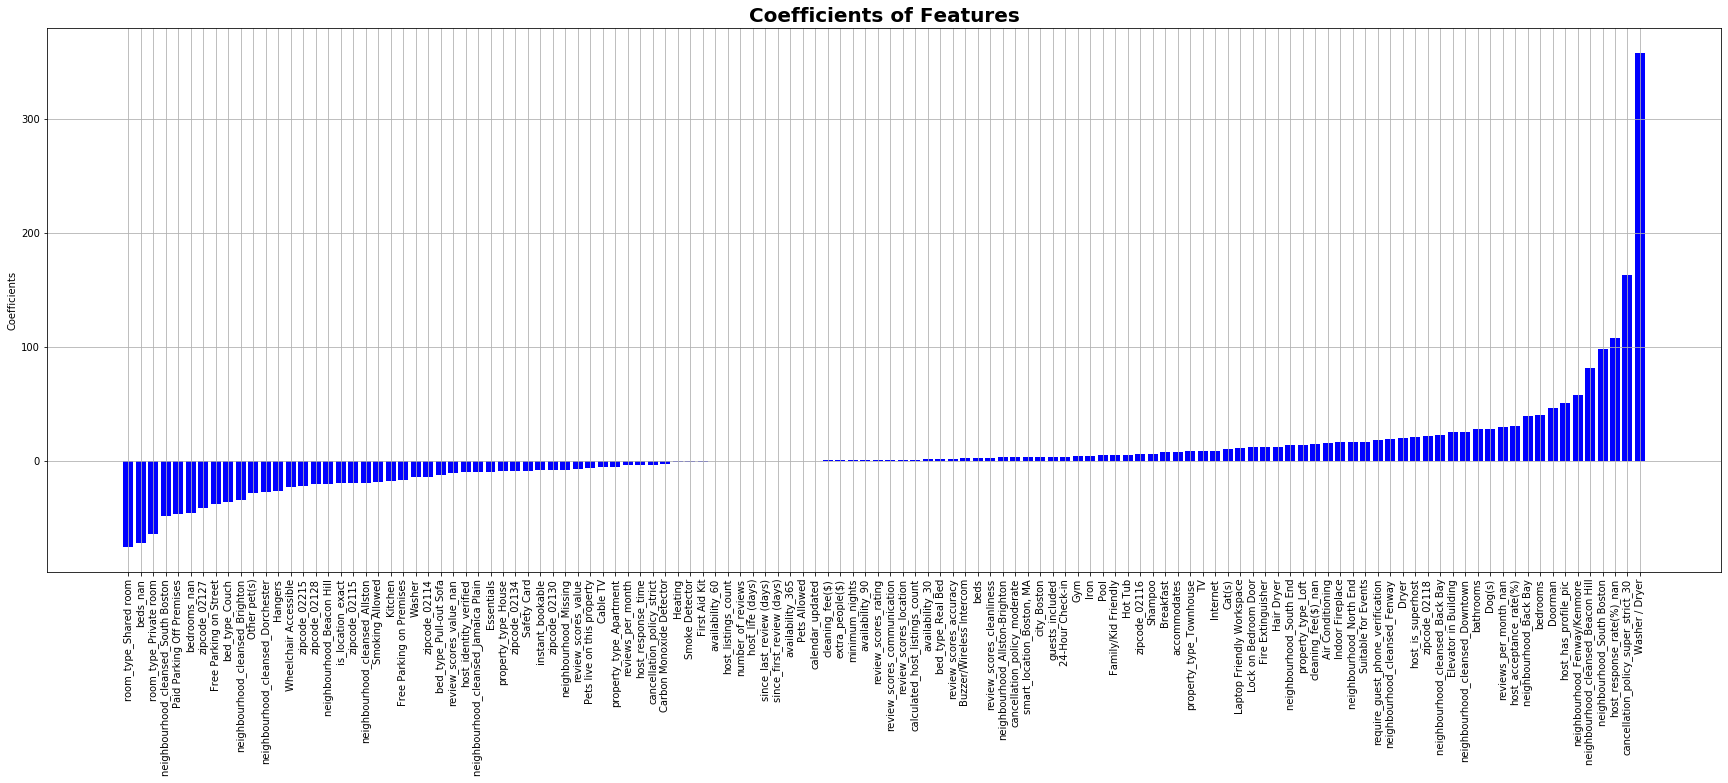

<Figure size 2160x720 with 0 Axes>

In [96]:
plt.rcParams['figure.figsize'] = (30,10)

fig, ax = plt.subplots()
fig = plt.figure(figsize=(30,10))

# ax = fig.add_subplot()
ax.set_facecolor(color= 'white')

ax.bar(coef_table['Features'],coef_table['Coefs'], color ='blue')

ax.set_xticklabels(coef_table['Features'],Rotation=90),
ax.set_ylabel('Coefficients')
ax.set_title('Coefficients of Features',fontsize=20,fontweight='bold')
ax.grid()
plt.show()

In [97]:
Y_pred = lr.predict(X_test)

In [98]:
from sklearn.metrics import r2_score, max_error, mean_squared_error

print("The model can accurately predict {} percent of the AirBnB prices".format(r2_score(y_test, Y_pred)*100))

The model can accurately predict 50.793385543328974 percent of the AirBnB prices


In [99]:
from sklearn.metrics import max_error
max_error(y_test, Y_pred)

870.8644614866731

In [100]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, Y_pred)


7828.855669469888